# NLP With Hotel Review Deliverable

Author: Owen Hsu 

## Table of Content

1. Introduction
2. Question of interest
3. Methods
4. Data Dictionary
5. Data Loading and Setup
6. Assessment
7. EDA
8. Data Preprocessing
9. Modeling
10. Conclusion

## Introduction

Hotel Management Inc. aims to enhance customer satisfaction and boost ratings by gaining deeper insights into the factors that contribute to positive hotel experiences. This project aims to analyze a comprehensive dataset of hotel reviews, which includes textual feedback from customers (both positive and negative comments) and detailed information about their stay (such as hotel location, time, and length of stay).

The primary objective of this analysis is to identify the qualities of a hotel stay that are most strongly associated with greater customer satisfaction and higher ratings. By doing so, Hotel Management Inc. can make data-driven decisions to improve their services and ensure a more enjoyable experience for their guests.

## Question of Interest

**The analysis aims to answer this one question:** <br />
How can we leverage machine learning to accurately predict the review score, thereby improving customer satisfaction and boost ratings. 

## Methods

For this analysis, we utilized the Python programming language along with its libraries, including pandas for data manipulation, matplotlib for data visualization, and sklearn for machine learning and data preprocessing tasks. Additionally, we employed Jupyter Notebook as our integrated development environment (IDE) to facilitate interactive programming and visualization, enhancing the efficiency and effectiveness of our workflow.

## Data Dictionary

In [1]:
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

* Unnamed: 0 
* Additional_Number_of_Scoring
* Average_Score
* Negative_Review
* Review_Total_Negative_Word_Counts
* Total_Number_of_Reviews
* Positive_Review
* Review_Total_Positive_Word_Counts
* Total_Number_of_Reviews_Reviewer_Has_Given
* Reviewer_Score
* Days_Since_Review
* Latitude
* Longitude
* Day
* Month
* Year
* Reviewer_Nationality_Australia
* Reviewer_Nationality_Ireland
* Reviewer_Nationality_UAE
* Reviewer_Nationality_UK
* Reviewer_Nationality_USA
* Reviewer_Nationality_Other
* Hotel_Address_Amsterdam
* Hotel_Address_Barcelona
* Hotel_Address_London
* Hotel_Address_Milan
* Hotel_Address_Paris
* Hotel_Address_Vienna
* Leisure_Trip
* Nights_Stayed

## Data Loading and Setup

In [2]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read in the data from status.csv
df = pd.read_csv('Hotel_Reviews.csv')

## Assessment

In [6]:
# Show the shape of the dataframe
df.shape

(515738, 30)

In [7]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set a large width

In [8]:
# Look at the first 10 rows
df.head(10)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2
5,5,194,7.7,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,0,10,52.360576,4.915968,24,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,1
6,6,194,7.7,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,0,17,52.360576,4.915968,17,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,5
7,7,194,7.7,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,1,17,52.360576,4.915968,17,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,2
8,8,194,7.7,Even though the pictures show very clean room...,34,1403,No Positive,0,3,0,25,52.360576,4.915968,9,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,1
9,9,194,7.7,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,0,26,52.360576,4.915968,8,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,7


In [9]:
# Get a quick overview of dataset variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

In [10]:
# Display the data types of the dataset
df.dtypes

Unnamed: 0                                      int64
Additional_Number_of_Scoring                    int64
Average_Score                                 float64
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
Days_Since_Review                               int64
Latitude                                      float64
Longitude                                     float64
Day                                             int64
Month                                           int64
Year                                            int64
Reviewer_Nationality_Australia                  int64
Reviewer_Nationality_Ireland                    int64
Reviewer_Nationality_UAE    

In [11]:
# Check the number of unique values in each column
df.nunique()

Unnamed: 0                                    515738
Additional_Number_of_Scoring                     480
Average_Score                                     34
Negative_Review                               330011
Review_Total_Negative_Word_Counts                402
Total_Number_of_Reviews                         1142
Positive_Review                               412601
Review_Total_Positive_Word_Counts                365
Total_Number_of_Reviews_Reviewer_Has_Given       198
Reviewer_Score                                     2
Days_Since_Review                                731
Latitude                                        1489
Longitude                                       1489
Day                                               31
Month                                             12
Year                                               3
Reviewer_Nationality_Australia                     2
Reviewer_Nationality_Ireland                       2
Reviewer_Nationality_UAE                      

In [12]:
# Get a statistical summary of the dataset
df.describe()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,257868.500000,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,2.893479,15.680221,6.486660,2016.120761,0.042048,0.028749,0.019845,0.475524,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,148880.880902,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,4.667477,8.864491,3.351779,0.687567,0.200700,0.167101,0.139469,0.499401,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,0.000000,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,128934.250000,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,257868.500000,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,386802.750000,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,515737.000000,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


In [13]:
# Sanity check to make sure we don't have any NAs
df.isna().sum()

Unnamed: 0                                    0
Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                

The original dataset has 515738 rows and 30 columns. 

We need to examine the 'Unnamed: 0' column since the name of the column is not well defined and it has the same number of unique values as the number of rows in our dataset.

In [14]:
# Check the number of unique values in 'Unnamed: 0' column
df['Unnamed: 0'].nunique()

515738

In [15]:
# Find the minimum value in the 'Unnamed: 0' column
df['Unnamed: 0'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0              0
1              1
2              2
3              3
4              4
           ...  
515733    515733
515734    515734
515735    515735
515736    515736
515737    515737
Name: Unnamed: 0, Length: 515738, dtype: int64>

**Findings:**

1. 'Unnamed: 0' column has 515738 rows and 515738 different values.

2. The values are the same as the row index.

**Decision on data handling:** <br />
Since this column contains duplicated information of the row index, it is not useful for our analysis. Therefore, we will drop it.

In [16]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [18]:
# Check for duplicated rows
df.duplicated().sum()

539

There are 539 duplicated rows in the dataset. We need to examine these duplicated rows closer.

In [19]:
# Calculate the percentage of duplicated rows
round((df.duplicated().sum() / len(df)) * 100, 2)

0.1

In [20]:
# Show duplicated rows
df[df.duplicated(keep=False)]

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
22083,83,8.3,Nothing,2,549,Good Service,3,5,1,0,48.849143,2.339712,3,8,2017,0,0,0,0,0,1,0,0,0,0,1,0,0,4
22084,83,8.3,Nothing,2,549,Good Service,3,5,1,0,48.849143,2.339712,3,8,2017,0,0,0,0,0,1,0,0,0,0,1,0,0,4
23703,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,51.528677,-0.128349,25,2,2017,0,0,0,0,0,1,0,0,1,0,0,0,0,1
23704,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,51.528677,-0.128349,25,2,2017,0,0,0,0,0,1,0,0,1,0,0,0,0,1
61875,300,9.0,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,1,7,51.517167,-0.129053,27,7,2017,0,0,0,0,0,1,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471973,311,8.3,Nothing,2,3720,Location and staff,4,20,0,718,45.461177,9.191047,16,8,2015,0,0,1,0,0,0,0,0,0,1,0,0,1,2
489214,904,8.1,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,0,577,45.533137,9.171102,4,1,2016,0,0,0,0,0,1,0,0,0,1,0,0,1,1
489215,904,8.1,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,0,577,45.533137,9.171102,4,1,2016,0,0,0,0,0,1,0,0,0,1,0,0,1,1
492717,162,8.6,No Negative,0,2286,The hotel is a beautiful gallery boutique hot...,108,18,1,692,45.451042,9.160654,11,9,2015,0,0,0,0,1,0,0,0,0,1,0,0,1,1


**Findings:**<br />
As indicated by the results above, 0.1% of the data is duplicated. These duplicated rows could have occurred during the data creation stage or due to technical issues.
<br /><br />
**Decision on data handling:** <br />
Since 0.1% of the rows contain duplicated information, they are not useful and can affect our analysis. Therefore, we will drop them.

In [21]:
# Drop duplicated rows
df.drop_duplicates(keep = 'first',inplace= True)

In [22]:
# Show the shape of the status dataframe
df.shape

(515199, 29)

The clean dataframe has 515199 rows and 29 columns.  <br />
Now, the dataset is clean and doesn't have missing value or duplicated rows. 

## EDA

First, we check the distribution of each numerical column by using histograms.

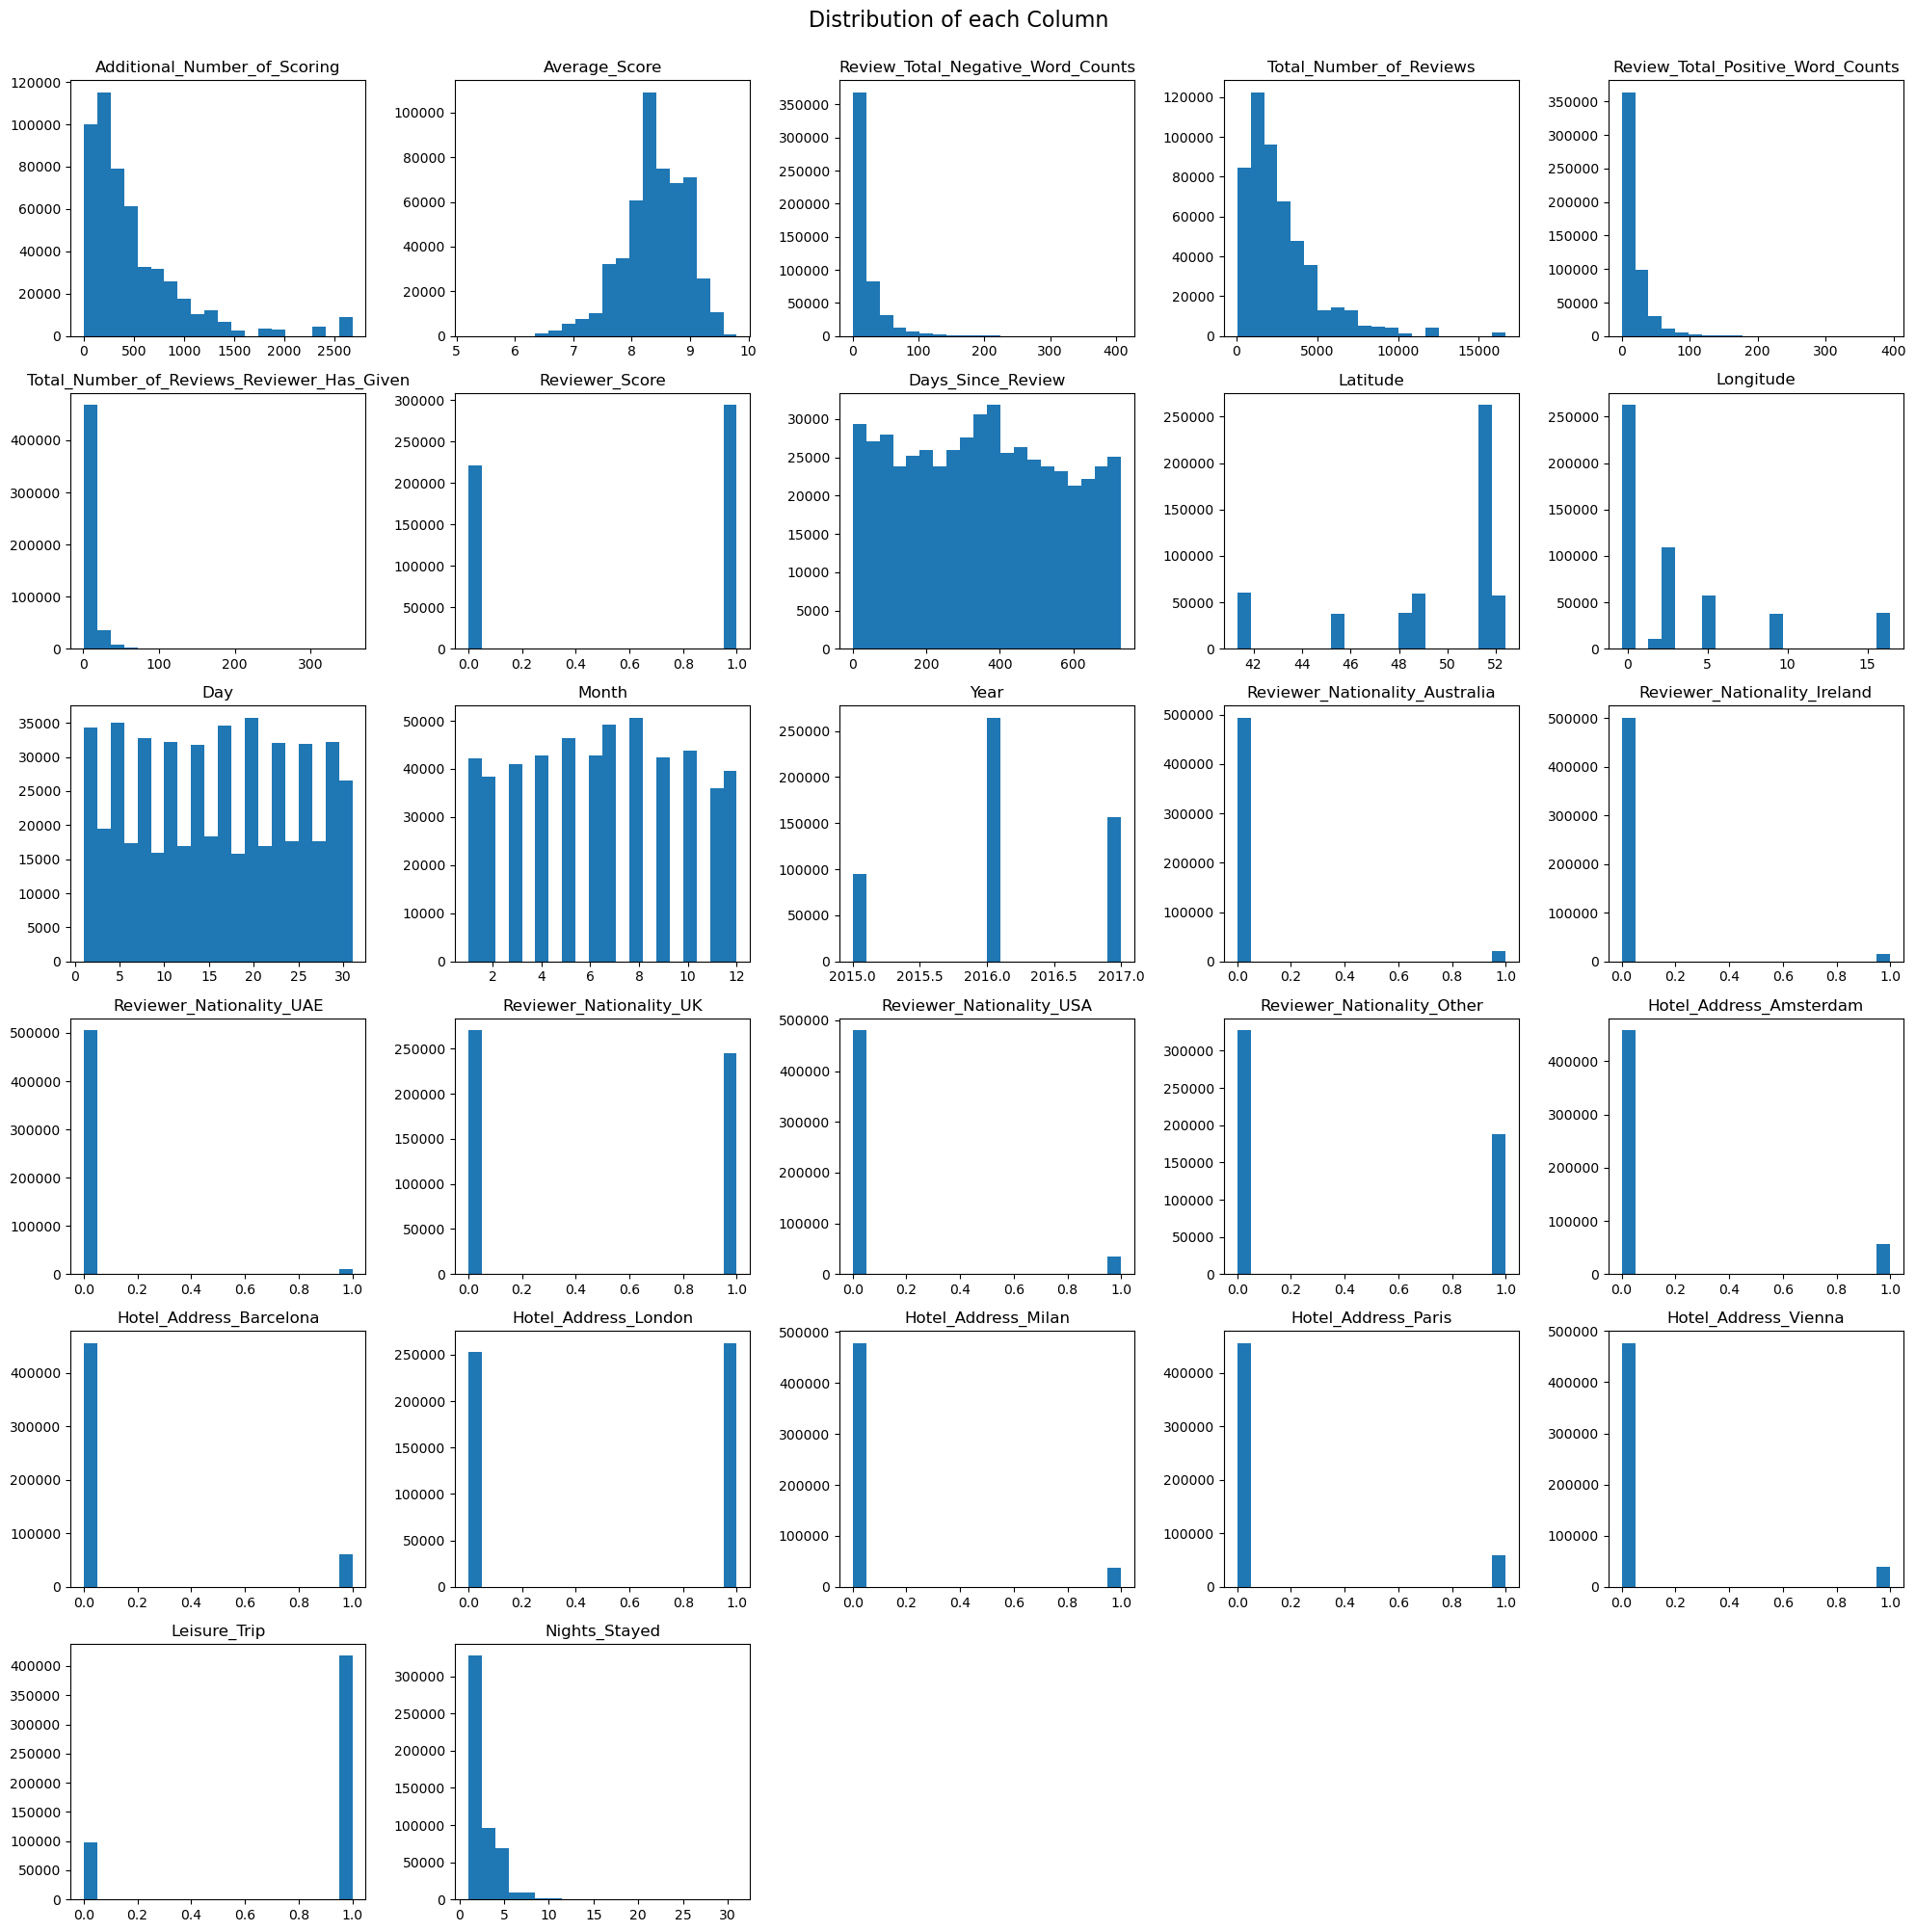

In [23]:
# Plot histograms for each column
df.hist(figsize=(20, 20), bins=20, grid=False)
plt.suptitle("Distribution of each Column", y=1, size=16)
plt.tight_layout()
plt.show()

We can see from above plot that 13 out of 27 numerical columns that are not binary.

In [24]:
# Get a statistical summary of the dataset
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.00000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000
mean,498.417604,8.397776,18.540711,2744.691424,17.778489,7.164750,0.570100,354.402120,49.433012,2.893915,15.680589,6.486043,2016.12092,0.042019,0.028754,0.019853,0.475752,0.068612,0.365010,0.111043,0.116747,0.509110,0.072209,0.115319,0.075573,0.810070,2.361750
std,500.673193,0.547947,29.693602,2318.112418,21.804665,11.039315,0.495062,208.909135,3.461933,4.669672,8.864227,3.351916,0.68751,0.200632,0.167114,0.139494,0.499412,0.252794,0.481434,0.314185,0.321119,0.499917,0.258834,0.319406,0.264314,0.392246,1.646734
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


**Observation:**

According to the histograms for each column and the statistical summary of the dataset, we observed that:
* 'Average_Score' has a normal distribution
* The majority of reviewers stay at the hotel <= 3 days
* 75% of review word count <= 23 (Negative reviews <=23; Positive reviews <= 22)

Then, we check the correlation between the numerical columns by using heatmap.

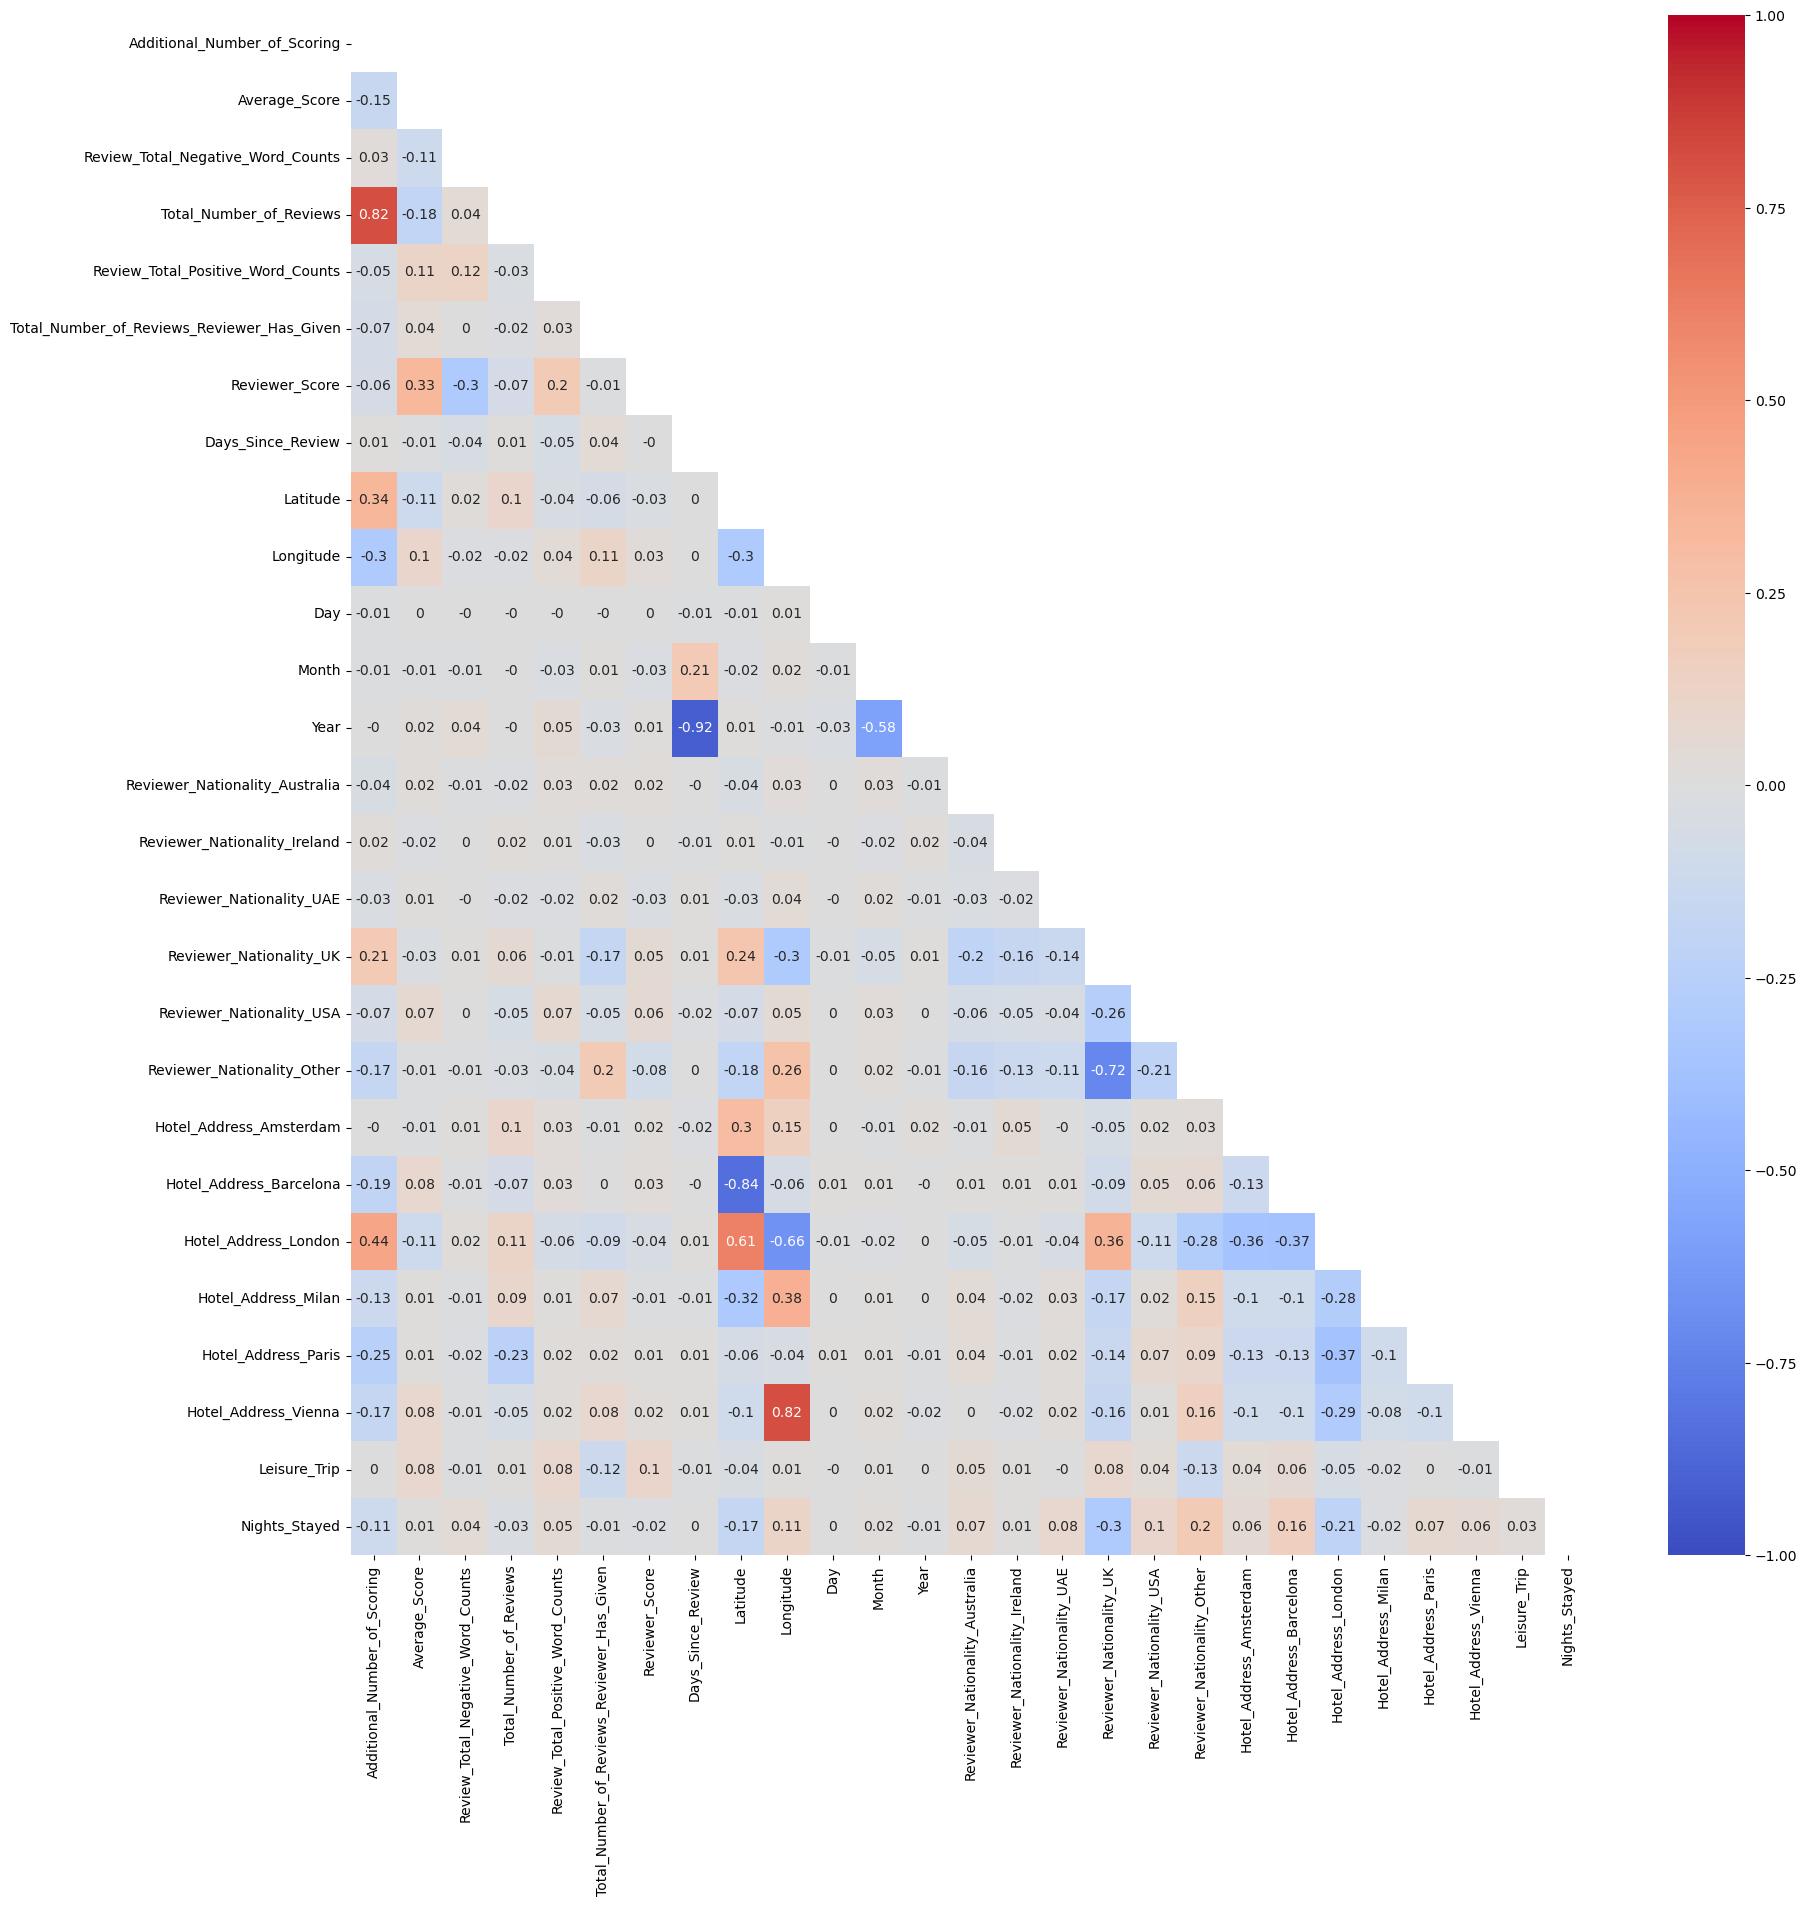

In [25]:
# calculate all the correlations between each independent numerical variable
numerical_df = df.select_dtypes(include=['number'])
corr_df = numerical_df.corr()

# mask for upper-triangular
mask = np.triu(corr_df)

# visualise it using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

**Observation:**

* 'Total_Number_of_Reviews' and 'Additional_Number_of_scoring' show a strong positive correlation
* 'Year' and 'Days_Since_Review' show a strong negative correlation
* 'Hotel_Address_Barcelona' and 'Latitude' show a strong negative correlation
* 'Hotel_Address_Vienna' and 'Longitude' show a strong positive correlation
* 'Reviewrs_Nationality_Other' and 'Reviewrs_Nationality_UK' show a strong negative correlation

Let's check our target variable 'Reviewer_Score' column

In [26]:
# Check all distinct values
df['Reviewer_Score'].value_counts()

Reviewer_Score
1    293715
0    221484
Name: count, dtype: int64

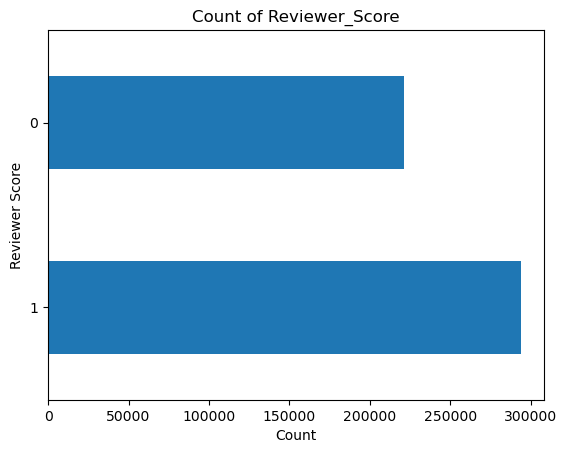

In [27]:
# Show the distribution of 'WNV Present'
df['Reviewer_Score'].value_counts().plot(kind='barh')
plt.title('Count of Reviewer_Score')
plt.xlabel('Count')
plt.ylabel('Reviewer Score')
plt.show()

In [28]:
# Get distribution % over distinct values
df['Reviewer_Score'].value_counts() / df.shape[0]

Reviewer_Score
1    0.5701
0    0.4299
Name: count, dtype: float64

**Observation:**

The data is slightly imbalanced, with more reivews in this dataset are positive than negative (around an 55/45 split).

<Figure size 1200x600 with 0 Axes>

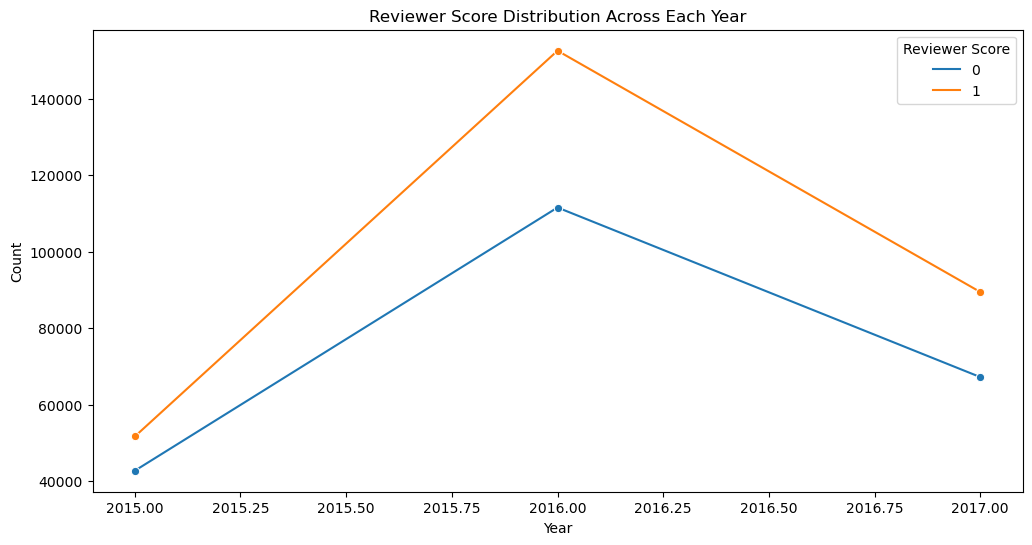

In [121]:
# Plot line chart for 'Reviewer_Score' across each year
plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby(['Year', 'Reviewer_Score']).size().reset_index(name='Count'),
             x='Year', 
             y='Count', 
             hue='Reviewer_Score',
             marker='o')
plt.title('Reviewer Score Distribution Across Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Reviewer Score')
plt.show()

**Observation:**<br/>
In terms of 'Reviewer_Score' across each year, the positive and negative review trends are quite similar, with both reaching their peak around 2016.

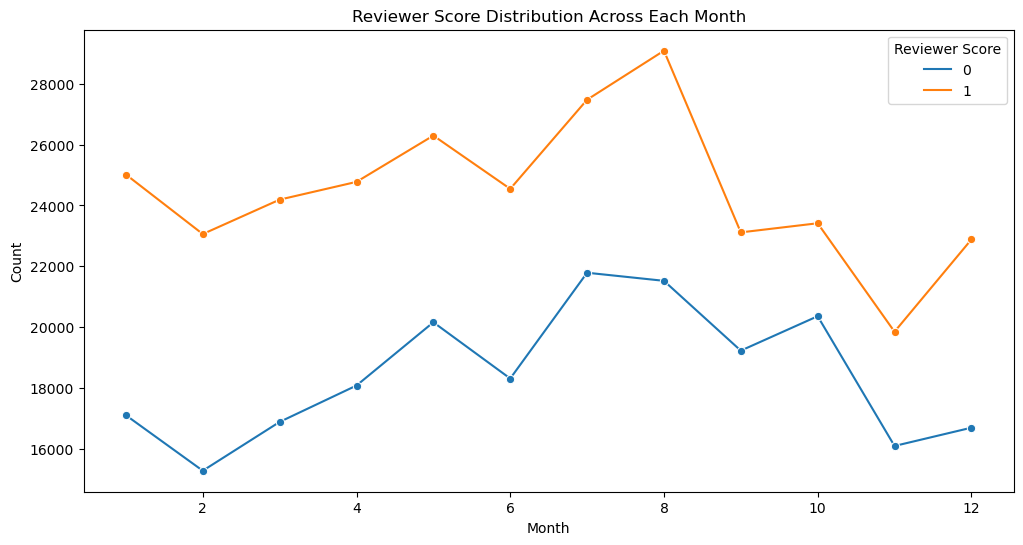

In [30]:
# Plot line graph for 'Reviewer_Score' across each month
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby(['Month', 'Reviewer_Score']).size().reset_index(name='Count'), 
             x='Month', 
             y='Count', 
             hue='Reviewer_Score', 
             marker='o')
plt.title('Reviewer Score Distribution Across Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Reviewer Score')
plt.show()

**Observation:**<br/>
We can see that the positive and negative review trends are quite similar in terms of 'Reviewer_Score' across each year, with both reaching their peak around July to August and hitting their lowest point around November.

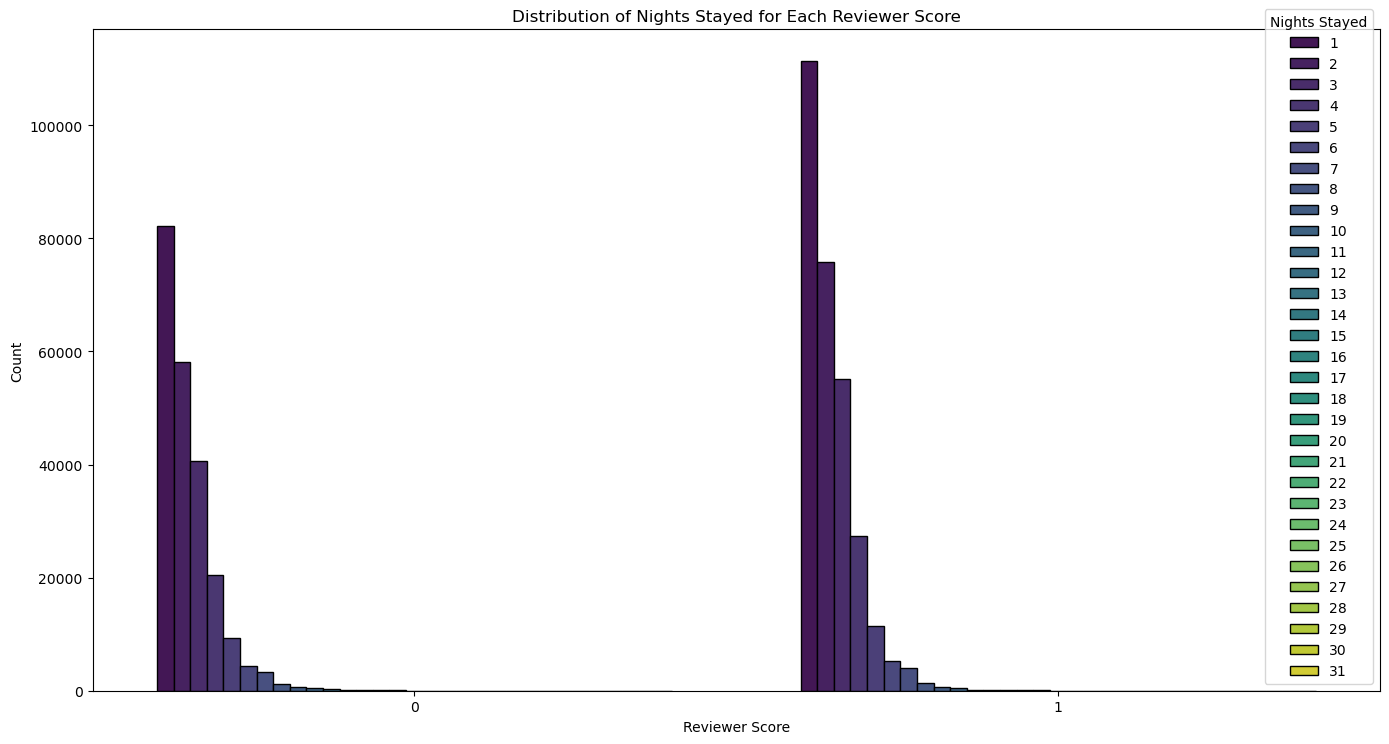

In [119]:
# Plot a countplot to check the 'Nights_Stayed' distribution for each 'Reviewer_Score'
plt.figure(figsize=(14, 8))

sns.countplot(x='Reviewer_Score', hue='Nights_Stayed', data=df, palette='viridis', edgecolor='black')
plt.title('Distribution of Nights Stayed for Each Reviewer Score')
plt.xlabel('Reviewer Score')
plt.ylabel('Count')
plt.legend(title='Nights Stayed')

plt.tight_layout()
plt.show()

**Observation:**<br/>
According to the plot, the majority of positive and negative reviews come from customers who stayed at the hotel for 1 to 3 days. This aligns with the statistical results we observed earlier.

## Data Preprocessing

#### The Train/Test Split

First, let's split the data into train and test sets by using the train_test_split function.

In [31]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df.drop(columns='Reviewer_Score')
y = df['Reviewer_Score']

# Split the data so the test set contains 30% of the points
# (the training set will contain the rest of the points)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Show the shape of train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(360639, 28) (154560, 28) (360639,) (154560,)


#### Vectorization 

##### Text Processing

We recognize that scikit-learn vectorizers provide basic tokenization, which includes punctuation removal (to the best of their ability) and converting all text to lowercase. However, to incorporate more advanced techniques such as stemming, we will define our own custom tokenization function. <br/>

We examined the dataset and noticed reviews with entries like 'No Positive' and 'No Negative'. These reviews will be replaced with an empty string before further processing.

Our custom tokenization includes the following functions: 

* Removing punctuation
* Setting words to lower case
* Splitting sentence into words (Splitting the strings on the whitespace)
* Removing stopwords and any tokens that are just empty strings
* Stemming

In [33]:
# Replace 'No Positive' and 'No Negative' with an empty string
X_train['Positive_Review'] = X_train['Positive_Review'].replace('No Positive', '')
X_train['Negative_Review'] = X_train['Negative_Review'].replace('No Negative', '')
X_test['Positive_Review'] = X_test['Positive_Review'].replace('No Positive', '')
X_test['Negative_Review'] = X_test['Negative_Review'].replace('No Negative', '')

In [34]:
# Import Porter Stemmer from nltk
import nltk

# Instantiate 
stemmer = nltk.stem.PorterStemmer()

In [35]:
# Import python string package that has a helpful punctuation list
import string

In [36]:
# Import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # Remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # Split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to /Users/chih-
[nltk_data]     kanghsu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### The Bag-of-Words model

After we've defined our own custom tokenization function. We now need to use our custom tokenization function and make the document-term matrix using the bag of words model. We can do that using the CountVectorizer() function from Sklearn. <br/>

Additionally, we will enhance the vectorizer with the following parameters:

* Removing Infrequent Words: We set min_df parameter to 10 to exclude any token that occurs in less than min_df documents.
* Setting a max_features parameter to 500 to restrict the vectorization to the max_features-many most frequent tokens (hence explicitly limiting our column count to max_features).

In [37]:
# Let's do the positive reviews first
# 1. Instantiate 
pos_bagofwords = CountVectorizer(min_df=10,
                             max_features=500,
                             tokenizer = my_tokenizer)
# 2. Fit
pos_bagofwords.fit(X_train['Positive_Review'])

# 3. Transform
pos_X_train_transformed = pos_bagofwords.transform(X_train['Positive_Review'])
pos_X_test_transformed = pos_bagofwords.transform(X_test['Positive_Review'])

In [38]:
# Show the shape of transformed positive train and test sets
print(pos_X_train_transformed.shape,pos_X_test_transformed.shape)

(360639, 500) (154560, 500)


In [39]:
# negative reviews
# 1. Instantiate 
neg_bagofwords = CountVectorizer(min_df=10,
                             max_features=500,
                             tokenizer = my_tokenizer)
# 2. Fit
neg_bagofwords.fit(X_train['Negative_Review'])

# 3. Transform
neg_X_train_transformed = neg_bagofwords.transform(X_train['Negative_Review'])
neg_X_test_transformed = neg_bagofwords.transform(X_test['Negative_Review'])

In [40]:
# Show the shape of transformed negative train and test sets
print(neg_X_train_transformed.shape,neg_X_train_transformed.shape)

(360639, 500) (360639, 500)


We can confirm that both our transformed train and test sets for positive and negative reviews contain a maximum of 500 words. <br/>Now, we need to add prefix to each column name so that we can identify which words are coming from the positive vs negative reviews.

In [41]:
# Create dataframs for positive train and test data 
# Add prefix "pos_" to each positive reviews train and test column name
pos_train_df = pd.DataFrame(pos_X_train_transformed.toarray(), columns = [f'pos_{col}' for col in pos_bagofwords.get_feature_names_out()])
pos_test_df = pd.DataFrame(pos_X_test_transformed.toarray(), columns = [f'pos_{col}' for col in pos_bagofwords.get_feature_names_out()])

In [42]:
# Look at the first 5 rows
pos_train_df.head()

,pos_1,pos_10,pos_15,pos_2,pos_20,pos_3,pos_30,pos_4,pos_5,pos_abl,pos_absolut,pos_access,pos_accommod,pos_across,pos_afternoon,pos_air,pos_airport,pos_allow,pos_almost,pos_also,pos_although,pos_alway,pos_amaz,pos_ambienc,pos_amen,pos_amsterdam,pos_anniversari,pos_anoth,pos_anyth,pos_apart,pos_appoint,pos_appreci,pos_area,pos_around,pos_arriv,pos_ask,pos_atmospher,pos_attent,pos_attract,pos_avail,pos_away,pos_awesom,pos_back,pos_bad,pos_bag,pos_balconi,pos_bar,pos_barcelona,pos_bath,pos_bathroom,pos_beach,pos_beauti,pos_bed,pos_bedroom,pos_best,pos_better,pos_big,pos_birthday,pos_bit,pos_block,pos_bonu,pos_book,pos_bottl,pos_boutiqu,pos_breakfast,pos_brilliant,pos_bu,pos_buffet,pos_build,pos_busi,pos_cafe,pos_cake,pos_call,pos_came,pos_canal,pos_car,pos_card,pos_care,pos_center,pos_centr,pos_central,pos_chang,pos_charg,pos_charm,pos_check,pos_chocol,pos_choic,pos_choos,pos_citi,pos_class,pos_clean,pos_cleanli,pos_close,pos_club,pos_cocktail,pos_coffe,pos_cold,pos_come,pos_comfi,pos_comfort,pos_complimentari,pos_concierg,pos_condit,pos_connect,pos_continent,pos_conveni,pos_cook,pos_cooki,pos_cool,pos_corner,pos_cosi,pos_cost,pos_could,pos_coupl,pos_courteou,pos_cozi,pos_custom,pos_day,pos_de,pos_decent,pos_decor,pos_definit,pos_delici,pos_design,pos_desk,pos_detail,pos_differ,pos_dine,pos_dinner,pos_direct,pos_distanc,pos_done,pos_door,pos_doubl,pos_drink,pos_duomo,pos_earli,pos_easi,pos_easili,pos_eat,pos_effici,pos_egg,pos_eiffel,pos_end,pos_english,pos_enjoy,pos_enough,pos_equip,pos_especi,pos_etc,pos_even,pos_ever,pos_everi,pos_everyon,pos_everyth,pos_everywher,pos_excel,pos_except,pos_execut,pos_expect,pos_expens,pos_experi,pos_explor,pos_extra,pos_extrem,pos_fab,pos_fabul,pos_face,pos_facil,pos_fact,pos_famili,pos_fantast,pos_far,pos_fast,pos_fault,pos_feel,pos_felt,pos_fi,pos_find,pos_fine,pos_first,pos_fit,pos_floor,pos_food,pos_found,pos_free,pos_fresh,pos_fridg,pos_friend,pos_friendli,pos_front,pos_fruit,pos_full,pos_furnish,pos_garden,pos_gave,pos_gener,pos_get,pos_give,pos_given,pos_glass,pos_go,pos_good,pos_gorgeou,pos_got,pos_great,pos_guest,pos_gym,pos_hall,pos_handi,pos_happi,pos_heart,pos_heat,pos_help,pos_helpful,pos_high,pos_highli,pos_home,pos_hospit,pos_hot,pos_hotel,pos_hour,pos_hous,pos_howev,pos_huge,pos_hyde,pos_ideal,pos_impress,pos_includ,pos_incred,pos_inform,pos_insid,pos_interest,pos_interior,pos_internet,pos_issu,pos_kensington,pos_kept,pos_kind,pos_king,pos_know,pos_la,pos_ladi,pos_larg,pos_last,pos_late,pos_leav,pos_left,pos_less,pos_level,pos_light,pos_like,pos_line,pos_link,pos_littl,pos_live,pos_lobbi,pos_local,pos_locat,pos_london,pos_long,pos_look,pos_lot,pos_loung,pos_love,pos_luggag,pos_luxuri,pos_machin,pos_made,pos_main,pos_major,pos_make,pos_manag,pos_mani,pos_market,pos_meal,pos_member,pos_metro,pos_milan,pos_min,pos_mini,pos_minut,pos_modern,pos_money,pos_morn,pos_much,pos_museum,pos_near,pos_nearbi,pos_need,pos_neighborhood,pos_never,pos_new,pos_next,pos_nice,pos_night,pos_nois,pos_noth,pos_o2,pos_offer,pos_ok,pos_old,pos_one,pos_open,pos_opposit,pos_option,pos_order,pos_outsid,pos_outstand,pos_overal,pos_overlook,pos_oxford,pos_paddington,pos_palac,pos_pari,pos_park,pos_part,pos_particularli,pos_pay,pos_peopl,pos_perfect,pos_perfectli,pos_person,pos_personnel,pos_phone,pos_pillow,pos_place,pos_pleas,pos_pleasant,pos_plenti,pos_plu,pos_point,pos_polit,pos_pool,pos_posit,pos_possibl,pos_present,pos_pretti,pos_price,pos_problem,pos_profession,pos_properti,pos_provid,pos_proxim,pos_pub,pos_public,pos_qualiti,pos_quick,pos_quiet,pos_quit,pos_rambla,pos_rate,pos_reach,pos_readi,pos_real,pos_realli,pos_reason,pos_recept,pos_receptionist,pos_recommend,pos_relax,pos_renov,pos_request,pos_restaur,pos_return,pos_right,pos_river,pos_road,pos_roof,pos_rooftop,pos_room,pos_round,pos_safe,pos_say,pos_second,pos_secur,pos_see,pos_seem,pos_select,pos_serv,pos_servic,pos_set,pos_sever,pos_shop,pos_short,pos_shower,pos_side,pos_sight,pos_sightse,pos_singl,pos_site,pos_situat,pos_size,pos_sleep,pos_sl

In [43]:
# Create dataframs for negative train and test data 
# Add prefix "neg_" to each negative reviews train and test column name
neg_train_df = pd.DataFrame(neg_X_train_transformed.toarray(), columns = [f'neg_{col}' for col in neg_bagofwords.get_feature_names_out()])
neg_test_df = pd.DataFrame(neg_X_test_transformed.toarray(), columns = [f'neg_{col}' for col in neg_bagofwords.get_feature_names_out()])

In [44]:
# Look at the first 5 rows
neg_train_df.head()

,neg_00,neg_1,neg_10,neg_12,neg_15,neg_2,neg_20,neg_3,neg_30,neg_4,neg_5,neg_50,neg_6,neg_7,neg_8,neg_abl,neg_absolut,neg_ac,neg_access,neg_actual,neg_addit,neg_advertis,neg_air,neg_airport,neg_allow,neg_almost,neg_alreadi,neg_also,neg_although,neg_alway,neg_amount,neg_annoy,neg_anoth,neg_anyth,neg_apart,neg_area,neg_around,neg_arriv,neg_ask,neg_avail,neg_averag,neg_aw,neg_away,neg_back,neg_bad,neg_bag,neg_bar,neg_basement,neg_basic,neg_bath,neg_bathroom,neg_bed,neg_bedroom,neg_best,neg_better,neg_big,neg_bigger,neg_bill,neg_bit,neg_block,neg_book,neg_bottl,neg_breakfast,neg_broken,neg_buffet,neg_build,neg_busi,neg_call,neg_came,neg_car,neg_card,neg_care,neg_carpet,neg_case,neg_center,neg_centr,neg_central,neg_chair,neg_chang,neg_channel,neg_charg,neg_check,neg_choic,neg_citi,neg_clean,neg_cleaner,neg_clear,neg_close,neg_cloth,neg_coffe,neg_cold,neg_com,neg_come,neg_comfort,neg_compar,neg_complain,neg_complaint,neg_complet,neg_complimentari,neg_con,neg_condit,neg_connect,neg_consid,neg_construct,neg_control,neg_cook,neg_cool,neg_corridor,neg_cost,neg_could,neg_coupl,neg_cover,neg_cramp,neg_credit,neg_cup,neg_curtain,neg_custom,neg_dark,neg_date,neg_day,neg_deal,neg_decor,neg_definit,neg_deposit,neg_design,neg_desk,neg_despit,neg_didnt,neg_differ,neg_difficult,neg_dinner,neg_dirti,neg_disappoint,neg_disturb,neg_done,neg_door,neg_doubl,neg_drink,neg_due,neg_earli,neg_eat,neg_egg,neg_either,neg_elev,neg_els,neg_empti,neg_end,neg_english,neg_enjoy,neg_enough,neg_enter,neg_entranc,neg_especi,neg_etc,neg_euro,neg_even,neg_ever,neg_everi,neg_everyth,neg_excel,neg_except,neg_execut,neg_expect,neg_expens,neg_experi,neg_extra,neg_extrem,neg_face,neg_facil,neg_fact,neg_famili,neg_fan,neg_far,neg_fault,neg_feel,neg_felt,neg_fi,neg_find,neg_fine,neg_first,neg_fit,neg_fix,neg_floor,neg_food,neg_found,neg_four,neg_free,neg_fresh,neg_fridg,neg_friend,neg_friendli,neg_front,neg_full,neg_furnitur,neg_gave,neg_gener,neg_get,neg_give,neg_given,neg_glass,neg_go,neg_good,neg_got,neg_great,neg_ground,neg_guest,neg_gym,neg_hair,neg_half,neg_hand,neg_happen,neg_happi,neg_hard,neg_head,neg_hear,neg_heat,neg_help,neg_high,neg_hot,neg_hotel,neg_hour,neg_housekeep,neg_howev,neg_improv,neg_includ,neg_inform,neg_insid,neg_instead,neg_internet,neg_iron,neg_issu,neg_item,neg_keep,neg_kept,neg_kettl,neg_key,neg_kind,neg_know,neg_lack,neg_ladi,neg_larg,neg_last,neg_late,neg_later,neg_least,neg_leav,neg_left,neg_less,neg_let,neg_level,neg_lift,neg_light,neg_like,neg_limit,neg_littl,neg_lobbi,neg_locat,neg_london,neg_long,neg_look,neg_lot,neg_loud,neg_loung,neg_love,neg_low,neg_luggag,neg_machin,neg_made,neg_main,neg_make,neg_manag,neg_mani,neg_mattress,neg_may,neg_mayb,neg_meal,neg_mean,neg_meant,neg_member,neg_mention,neg_menu,neg_metro,neg_middl,neg_milk,neg_min,neg_mini,neg_minor,neg_minut,neg_mirror,neg_miss,neg_money,neg_morn,neg_move,neg_much,neg_n,neg_near,neg_nearbi,neg_need,neg_neg,neg_never,neg_new,neg_next,neg_nice,neg_night,neg_nois,neg_noisi,neg_non,neg_none,neg_normal,neg_noth,neg_offer,neg_ok,neg_old,neg_one,neg_open,neg_option,neg_order,neg_otherwis,neg_outsid,neg_overal,neg_overpr,neg_paid,neg_pari,neg_park,neg_part,neg_pay,neg_peopl,neg_per,neg_perfect,neg_person,neg_phone,neg_pictur,neg_pillow,neg_place,neg_plug,neg_point,neg_pool,neg_poor,neg_possibl,neg_prefer,neg_pretti,neg_price,neg_pricey,neg_probabl,neg_problem,neg_properli,neg_provid,neg_put,neg_qualiti,neg_queue,neg_quiet,neg_quit,neg_rate,neg_rather,neg_readi,neg_realli,neg_reason,neg_receiv,neg_recept,neg_receptionist,neg_recommend,neg_refund,neg_refurbish,neg_renov,neg_replac,neg_request,neg_reserv,neg_rest,neg_restaur,neg_return,neg_right,neg_road,neg_roof,neg_room,neg_rude,neg_run,neg_safe,neg_said,neg_say,neg_seat,neg_second,neg_see,neg_seem,neg_select,neg_separ,neg_serv,neg_servic,neg_set,neg_sever,neg_sheet,neg_short,neg_show,neg_shower,neg_side,neg_sign,neg_sinc,neg_singl,neg_sink,neg_sit,neg_site,neg_size,neg_sleep,neg_slightli,neg_slow,neg_small,neg_smaller,neg_smell,neg_smo

Since we have both positive and negative training and testing dataframes, we can now combine the positive and negative training dataframes, as well as the positive and negative testing dataframes.

In [45]:
# Combine positive and negative training dataframes
merged_train = pd.concat([pos_train_df,neg_train_df], axis=1)

In [46]:
# Combine positive and negative testing dataframes
merged_test = pd.concat([pos_test_df,neg_test_df], axis=1)

In [47]:
# Look at the first 5 rows
merged_train.head()

,pos_1,pos_10,pos_15,pos_2,pos_20,pos_3,pos_30,pos_4,pos_5,pos_abl,pos_absolut,pos_access,pos_accommod,pos_across,pos_afternoon,pos_air,pos_airport,pos_allow,pos_almost,pos_also,pos_although,pos_alway,pos_amaz,pos_ambienc,pos_amen,pos_amsterdam,pos_anniversari,pos_anoth,pos_anyth,pos_apart,pos_appoint,pos_appreci,pos_area,pos_around,pos_arriv,pos_ask,pos_atmospher,pos_attent,pos_attract,pos_avail,pos_away,pos_awesom,pos_back,pos_bad,pos_bag,pos_balconi,pos_bar,pos_barcelona,pos_bath,pos_bathroom,pos_beach,pos_beauti,pos_bed,pos_bedroom,pos_best,pos_better,pos_big,pos_birthday,pos_bit,pos_block,pos_bonu,pos_book,pos_bottl,pos_boutiqu,pos_breakfast,pos_brilliant,pos_bu,pos_buffet,pos_build,pos_busi,pos_cafe,pos_cake,pos_call,pos_came,pos_canal,pos_car,pos_card,pos_care,pos_center,pos_centr,pos_central,pos_chang,pos_charg,pos_charm,pos_check,pos_chocol,pos_choic,pos_choos,pos_citi,pos_class,pos_clean,pos_cleanli,pos_close,pos_club,pos_cocktail,pos_coffe,pos_cold,pos_come,pos_comfi,pos_comfort,pos_complimentari,pos_concierg,pos_condit,pos_connect,pos_continent,pos_conveni,pos_cook,pos_cooki,pos_cool,pos_corner,pos_cosi,pos_cost,pos_could,pos_coupl,pos_courteou,pos_cozi,pos_custom,pos_day,pos_de,pos_decent,pos_decor,pos_definit,pos_delici,pos_design,pos_desk,pos_detail,pos_differ,pos_dine,pos_dinner,pos_direct,pos_distanc,pos_done,pos_door,pos_doubl,pos_drink,pos_duomo,pos_earli,pos_easi,pos_easili,pos_eat,pos_effici,pos_egg,pos_eiffel,pos_end,pos_english,pos_enjoy,pos_enough,pos_equip,pos_especi,pos_etc,pos_even,pos_ever,pos_everi,pos_everyon,pos_everyth,pos_everywher,pos_excel,pos_except,pos_execut,pos_expect,pos_expens,pos_experi,pos_explor,pos_extra,pos_extrem,pos_fab,pos_fabul,pos_face,pos_facil,pos_fact,pos_famili,pos_fantast,pos_far,pos_fast,pos_fault,pos_feel,pos_felt,pos_fi,pos_find,pos_fine,pos_first,pos_fit,pos_floor,pos_food,pos_found,pos_free,pos_fresh,pos_fridg,pos_friend,pos_friendli,pos_front,pos_fruit,pos_full,pos_furnish,pos_garden,pos_gave,pos_gener,pos_get,pos_give,pos_given,pos_glass,pos_go,pos_good,pos_gorgeou,pos_got,pos_great,pos_guest,pos_gym,pos_hall,pos_handi,pos_happi,pos_heart,pos_heat,pos_help,pos_helpful,pos_high,pos_highli,pos_home,pos_hospit,pos_hot,pos_hotel,pos_hour,pos_hous,pos_howev,pos_huge,pos_hyde,pos_ideal,pos_impress,pos_includ,pos_incred,pos_inform,pos_insid,pos_interest,pos_interior,pos_internet,pos_issu,pos_kensington,pos_kept,pos_kind,pos_king,pos_know,pos_la,pos_ladi,pos_larg,pos_last,pos_late,pos_leav,pos_left,pos_less,pos_level,pos_light,pos_like,pos_line,pos_link,pos_littl,pos_live,pos_lobbi,pos_local,pos_locat,pos_london,pos_long,pos_look,pos_lot,pos_loung,pos_love,pos_luggag,pos_luxuri,pos_machin,pos_made,pos_main,pos_major,pos_make,pos_manag,pos_mani,pos_market,pos_meal,pos_member,pos_metro,pos_milan,pos_min,pos_mini,pos_minut,pos_modern,pos_money,pos_morn,pos_much,pos_museum,pos_near,pos_nearbi,pos_need,pos_neighborhood,pos_never,pos_new,pos_next,pos_nice,pos_night,pos_nois,pos_noth,pos_o2,pos_offer,pos_ok,pos_old,pos_one,pos_open,pos_opposit,pos_option,pos_order,pos_outsid,pos_outstand,pos_overal,pos_overlook,pos_oxford,pos_paddington,pos_palac,pos_pari,pos_park,pos_part,pos_particularli,pos_pay,pos_peopl,pos_perfect,pos_perfectli,pos_person,pos_personnel,pos_phone,pos_pillow,pos_place,pos_pleas,pos_pleasant,pos_plenti,pos_plu,pos_point,pos_polit,pos_pool,pos_posit,pos_possibl,pos_present,pos_pretti,pos_price,pos_problem,pos_profession,pos_properti,pos_provid,pos_proxim,pos_pub,pos_public,pos_qualiti,pos_quick,pos_quiet,pos_quit,pos_rambla,pos_rate,pos_reach,pos_readi,pos_real,pos_realli,pos_reason,pos_recept,pos_receptionist,pos_recommend,pos_relax,pos_renov,pos_request,pos_restaur,pos_return,pos_right,pos_river,pos_road,pos_roof,pos_rooftop,pos_room,pos_round,pos_safe,pos_say,pos_second,pos_secur,pos_see,pos_seem,pos_select,pos_serv,pos_servic,pos_set,pos_sever,pos_shop,pos_short,pos_shower,pos_side,pos_sight,pos_sightse,pos_singl,pos_site,pos_situat,pos_size,pos_sleep,pos_sl

In [48]:
# Look at the first 5 rows
merged_test.head()

,pos_1,pos_10,pos_15,pos_2,pos_20,pos_3,pos_30,pos_4,pos_5,pos_abl,pos_absolut,pos_access,pos_accommod,pos_across,pos_afternoon,pos_air,pos_airport,pos_allow,pos_almost,pos_also,pos_although,pos_alway,pos_amaz,pos_ambienc,pos_amen,pos_amsterdam,pos_anniversari,pos_anoth,pos_anyth,pos_apart,pos_appoint,pos_appreci,pos_area,pos_around,pos_arriv,pos_ask,pos_atmospher,pos_attent,pos_attract,pos_avail,pos_away,pos_awesom,pos_back,pos_bad,pos_bag,pos_balconi,pos_bar,pos_barcelona,pos_bath,pos_bathroom,pos_beach,pos_beauti,pos_bed,pos_bedroom,pos_best,pos_better,pos_big,pos_birthday,pos_bit,pos_block,pos_bonu,pos_book,pos_bottl,pos_boutiqu,pos_breakfast,pos_brilliant,pos_bu,pos_buffet,pos_build,pos_busi,pos_cafe,pos_cake,pos_call,pos_came,pos_canal,pos_car,pos_card,pos_care,pos_center,pos_centr,pos_central,pos_chang,pos_charg,pos_charm,pos_check,pos_chocol,pos_choic,pos_choos,pos_citi,pos_class,pos_clean,pos_cleanli,pos_close,pos_club,pos_cocktail,pos_coffe,pos_cold,pos_come,pos_comfi,pos_comfort,pos_complimentari,pos_concierg,pos_condit,pos_connect,pos_continent,pos_conveni,pos_cook,pos_cooki,pos_cool,pos_corner,pos_cosi,pos_cost,pos_could,pos_coupl,pos_courteou,pos_cozi,pos_custom,pos_day,pos_de,pos_decent,pos_decor,pos_definit,pos_delici,pos_design,pos_desk,pos_detail,pos_differ,pos_dine,pos_dinner,pos_direct,pos_distanc,pos_done,pos_door,pos_doubl,pos_drink,pos_duomo,pos_earli,pos_easi,pos_easili,pos_eat,pos_effici,pos_egg,pos_eiffel,pos_end,pos_english,pos_enjoy,pos_enough,pos_equip,pos_especi,pos_etc,pos_even,pos_ever,pos_everi,pos_everyon,pos_everyth,pos_everywher,pos_excel,pos_except,pos_execut,pos_expect,pos_expens,pos_experi,pos_explor,pos_extra,pos_extrem,pos_fab,pos_fabul,pos_face,pos_facil,pos_fact,pos_famili,pos_fantast,pos_far,pos_fast,pos_fault,pos_feel,pos_felt,pos_fi,pos_find,pos_fine,pos_first,pos_fit,pos_floor,pos_food,pos_found,pos_free,pos_fresh,pos_fridg,pos_friend,pos_friendli,pos_front,pos_fruit,pos_full,pos_furnish,pos_garden,pos_gave,pos_gener,pos_get,pos_give,pos_given,pos_glass,pos_go,pos_good,pos_gorgeou,pos_got,pos_great,pos_guest,pos_gym,pos_hall,pos_handi,pos_happi,pos_heart,pos_heat,pos_help,pos_helpful,pos_high,pos_highli,pos_home,pos_hospit,pos_hot,pos_hotel,pos_hour,pos_hous,pos_howev,pos_huge,pos_hyde,pos_ideal,pos_impress,pos_includ,pos_incred,pos_inform,pos_insid,pos_interest,pos_interior,pos_internet,pos_issu,pos_kensington,pos_kept,pos_kind,pos_king,pos_know,pos_la,pos_ladi,pos_larg,pos_last,pos_late,pos_leav,pos_left,pos_less,pos_level,pos_light,pos_like,pos_line,pos_link,pos_littl,pos_live,pos_lobbi,pos_local,pos_locat,pos_london,pos_long,pos_look,pos_lot,pos_loung,pos_love,pos_luggag,pos_luxuri,pos_machin,pos_made,pos_main,pos_major,pos_make,pos_manag,pos_mani,pos_market,pos_meal,pos_member,pos_metro,pos_milan,pos_min,pos_mini,pos_minut,pos_modern,pos_money,pos_morn,pos_much,pos_museum,pos_near,pos_nearbi,pos_need,pos_neighborhood,pos_never,pos_new,pos_next,pos_nice,pos_night,pos_nois,pos_noth,pos_o2,pos_offer,pos_ok,pos_old,pos_one,pos_open,pos_opposit,pos_option,pos_order,pos_outsid,pos_outstand,pos_overal,pos_overlook,pos_oxford,pos_paddington,pos_palac,pos_pari,pos_park,pos_part,pos_particularli,pos_pay,pos_peopl,pos_perfect,pos_perfectli,pos_person,pos_personnel,pos_phone,pos_pillow,pos_place,pos_pleas,pos_pleasant,pos_plenti,pos_plu,pos_point,pos_polit,pos_pool,pos_posit,pos_possibl,pos_present,pos_pretti,pos_price,pos_problem,pos_profession,pos_properti,pos_provid,pos_proxim,pos_pub,pos_public,pos_qualiti,pos_quick,pos_quiet,pos_quit,pos_rambla,pos_rate,pos_reach,pos_readi,pos_real,pos_realli,pos_reason,pos_recept,pos_receptionist,pos_recommend,pos_relax,pos_renov,pos_request,pos_restaur,pos_return,pos_right,pos_river,pos_road,pos_roof,pos_rooftop,pos_room,pos_round,pos_safe,pos_say,pos_second,pos_secur,pos_see,pos_seem,pos_select,pos_serv,pos_servic,pos_set,pos_sever,pos_shop,pos_short,pos_shower,pos_side,pos_sight,pos_sightse,pos_singl,pos_site,pos_situat,pos_size,pos_sleep,pos_sl

We can now concatenate vectorized data with the original trainig and testing dataframes.

In [49]:
# Combine merged_train with original X_train
X_train = pd.concat([X_train.reset_index(drop= True), merged_train.reset_index(drop=True)], axis = 1)

# Combine merged_test with original X_test
X_test = pd.concat([X_test.reset_index(drop= True), merged_test.reset_index(drop=True)], axis = 1)

In [50]:
# Look at the first 5 rows
X_train.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,pos_1,pos_10,pos_15,pos_2,pos_20,pos_3,pos_30,pos_4,pos_5,pos_abl,pos_absolut,pos_access,pos_accommod,pos_across,pos_afternoon,pos_air,pos_airport,pos_allow,pos_almost,pos_also,pos_although,pos_alway,pos_amaz,pos_ambienc,pos_amen,pos_amsterdam,pos_anniversari,pos_anoth,pos_anyth,pos_apart,pos_appoint,pos_appreci,pos_area,pos_around,pos_arriv,pos_ask,pos_atmospher,pos_attent,pos_attract,pos_avail,pos_away,pos_awesom,pos_back,pos_bad,pos_bag,pos_balconi,pos_bar,pos_barcelona,pos_bath,pos_bathroom,pos_beach,pos_beauti,pos_bed,pos_bedroom,pos_best,pos_better,pos_big,pos_birthday,pos_bit,pos_block,pos_bonu,pos_book,pos_bottl,pos_boutiqu,pos_breakfast,pos_brilliant,pos_bu,pos_buffet,pos_build,pos_busi,pos_cafe,pos_cake,pos_call,pos_came,pos_canal,pos_car,pos_card,pos_care,pos_center,pos_centr,pos_central,pos_chang,pos_charg,pos_charm,pos_check,pos_chocol,pos_choic,pos_choos,pos_citi,pos_class,pos_clean,pos_cleanli,pos_close,pos_club,pos_cocktail,pos_coffe,pos_cold,pos_come,pos_comfi,pos_comfort,pos_complimentari,pos_concierg,pos_condit,pos_connect,pos_continent,pos_conveni,pos_cook,pos_cooki,pos_cool,pos_corner,pos_cosi,pos_cost,pos_could,pos_coupl,pos_courteou,pos_cozi,pos_custom,pos_day,pos_de,pos_decent,pos_decor,pos_definit,pos_delici,pos_design,pos_desk,pos_detail,pos_differ,pos_dine,pos_dinner,pos_direct,pos_distanc,pos_done,pos_door,pos_doubl,pos_drink,pos_duomo,pos_earli,pos_easi,pos_easili,pos_eat,pos_effici,pos_egg,pos_eiffel,pos_end,pos_english,pos_enjoy,pos_enough,pos_equip,pos_especi,pos_etc,pos_even,pos_ever,pos_everi,pos_everyon,pos_everyth,pos_everywher,pos_excel,pos_except,pos_execut,pos_expect,pos_expens,pos_experi,pos_explor,pos_extra,pos_extrem,pos_fab,pos_fabul,pos_face,pos_facil,pos_fact,pos_famili,pos_fantast,pos_far,pos_fast,pos_fault,pos_feel,pos_felt,pos_fi,pos_find,pos_fine,pos_first,pos_fit,pos_floor,pos_food,pos_found,pos_free,pos_fresh,pos_fridg,pos_friend,pos_friendli,pos_front,pos_fruit,pos_full,pos_furnish,pos_garden,pos_gave,pos_gener,pos_get,pos_give,pos_given,pos_glass,pos_go,pos_good,pos_gorgeou,pos_got,pos_great,pos_guest,pos_gym,pos_hall,pos_handi,pos_happi,pos_heart,pos_heat,pos_help,pos_helpful,pos_high,pos_highli,pos_home,pos_hospit,pos_hot,pos_hotel,pos_hour,pos_hous,pos_howev,pos_huge,pos_hyde,pos_ideal,pos_impress,pos_includ,pos_incred,pos_inform,pos_insid,pos_interest,pos_interior,pos_internet,pos_issu,pos_kensington,pos_kept,pos_kind,pos_king,pos_know,pos_la,pos_ladi,pos_larg,pos_last,pos_late,pos_leav,pos_left,pos_less,pos_level,pos_light,pos_like,pos_line,pos_link,pos_littl,pos_live,pos_lobbi,pos_local,pos_locat,pos_london,pos_long,pos_look,pos_lot,pos_loung,pos_love,pos_luggag,pos_luxuri,pos_machin,pos_made,pos_main,pos_major,pos_make,pos_manag,pos_mani,pos_market,pos_meal,pos_member,pos_metro,pos_milan,pos_min,pos_mini,pos_minut,pos_modern,pos_money,pos_morn,pos_much,pos_museum,pos_near,pos_nearbi,pos_need,pos_neighborhood,pos_never,pos_new,pos_next,pos_nice,pos_night,pos_nois,pos_noth,pos_o2,pos_offer,pos_ok,pos_old,pos_one,pos_open,pos_opposit,pos_option,pos_order,pos_outsid,pos_outstand,pos_overal,pos_overlook,pos_oxford,pos_paddington,pos_palac,pos_pari,pos_park,pos_part,pos_particularli,pos_pay,pos_peopl,pos_perfect,pos_perfectli,pos_person,pos_personnel,pos_phone,pos_pillow,pos_place,pos_pleas,pos_pleasant,pos_plenti,pos_plu,pos_point,pos_polit,pos_pool,pos_posit,pos_possibl,pos_present,pos_pretti,pos_price

In [51]:
# Look at the first 5 rows
X_test.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed,pos_1,pos_10,pos_15,pos_2,pos_20,pos_3,pos_30,pos_4,pos_5,pos_abl,pos_absolut,pos_access,pos_accommod,pos_across,pos_afternoon,pos_air,pos_airport,pos_allow,pos_almost,pos_also,pos_although,pos_alway,pos_amaz,pos_ambienc,pos_amen,pos_amsterdam,pos_anniversari,pos_anoth,pos_anyth,pos_apart,pos_appoint,pos_appreci,pos_area,pos_around,pos_arriv,pos_ask,pos_atmospher,pos_attent,pos_attract,pos_avail,pos_away,pos_awesom,pos_back,pos_bad,pos_bag,pos_balconi,pos_bar,pos_barcelona,pos_bath,pos_bathroom,pos_beach,pos_beauti,pos_bed,pos_bedroom,pos_best,pos_better,pos_big,pos_birthday,pos_bit,pos_block,pos_bonu,pos_book,pos_bottl,pos_boutiqu,pos_breakfast,pos_brilliant,pos_bu,pos_buffet,pos_build,pos_busi,pos_cafe,pos_cake,pos_call,pos_came,pos_canal,pos_car,pos_card,pos_care,pos_center,pos_centr,pos_central,pos_chang,pos_charg,pos_charm,pos_check,pos_chocol,pos_choic,pos_choos,pos_citi,pos_class,pos_clean,pos_cleanli,pos_close,pos_club,pos_cocktail,pos_coffe,pos_cold,pos_come,pos_comfi,pos_comfort,pos_complimentari,pos_concierg,pos_condit,pos_connect,pos_continent,pos_conveni,pos_cook,pos_cooki,pos_cool,pos_corner,pos_cosi,pos_cost,pos_could,pos_coupl,pos_courteou,pos_cozi,pos_custom,pos_day,pos_de,pos_decent,pos_decor,pos_definit,pos_delici,pos_design,pos_desk,pos_detail,pos_differ,pos_dine,pos_dinner,pos_direct,pos_distanc,pos_done,pos_door,pos_doubl,pos_drink,pos_duomo,pos_earli,pos_easi,pos_easili,pos_eat,pos_effici,pos_egg,pos_eiffel,pos_end,pos_english,pos_enjoy,pos_enough,pos_equip,pos_especi,pos_etc,pos_even,pos_ever,pos_everi,pos_everyon,pos_everyth,pos_everywher,pos_excel,pos_except,pos_execut,pos_expect,pos_expens,pos_experi,pos_explor,pos_extra,pos_extrem,pos_fab,pos_fabul,pos_face,pos_facil,pos_fact,pos_famili,pos_fantast,pos_far,pos_fast,pos_fault,pos_feel,pos_felt,pos_fi,pos_find,pos_fine,pos_first,pos_fit,pos_floor,pos_food,pos_found,pos_free,pos_fresh,pos_fridg,pos_friend,pos_friendli,pos_front,pos_fruit,pos_full,pos_furnish,pos_garden,pos_gave,pos_gener,pos_get,pos_give,pos_given,pos_glass,pos_go,pos_good,pos_gorgeou,pos_got,pos_great,pos_guest,pos_gym,pos_hall,pos_handi,pos_happi,pos_heart,pos_heat,pos_help,pos_helpful,pos_high,pos_highli,pos_home,pos_hospit,pos_hot,pos_hotel,pos_hour,pos_hous,pos_howev,pos_huge,pos_hyde,pos_ideal,pos_impress,pos_includ,pos_incred,pos_inform,pos_insid,pos_interest,pos_interior,pos_internet,pos_issu,pos_kensington,pos_kept,pos_kind,pos_king,pos_know,pos_la,pos_ladi,pos_larg,pos_last,pos_late,pos_leav,pos_left,pos_less,pos_level,pos_light,pos_like,pos_line,pos_link,pos_littl,pos_live,pos_lobbi,pos_local,pos_locat,pos_london,pos_long,pos_look,pos_lot,pos_loung,pos_love,pos_luggag,pos_luxuri,pos_machin,pos_made,pos_main,pos_major,pos_make,pos_manag,pos_mani,pos_market,pos_meal,pos_member,pos_metro,pos_milan,pos_min,pos_mini,pos_minut,pos_modern,pos_money,pos_morn,pos_much,pos_museum,pos_near,pos_nearbi,pos_need,pos_neighborhood,pos_never,pos_new,pos_next,pos_nice,pos_night,pos_nois,pos_noth,pos_o2,pos_offer,pos_ok,pos_old,pos_one,pos_open,pos_opposit,pos_option,pos_order,pos_outsid,pos_outstand,pos_overal,pos_overlook,pos_oxford,pos_paddington,pos_palac,pos_pari,pos_park,pos_part,pos_particularli,pos_pay,pos_peopl,pos_perfect,pos_perfectli,pos_person,pos_personnel,pos_phone,pos_pillow,pos_place,pos_pleas,pos_pleasant,pos_plenti,pos_plu,pos_point,pos_polit,pos_pool,pos_posit,pos_possibl,pos_present,pos_pretti,pos_price

Both training and testing dataframes look good. We can drop the 'Positive_Review' and 'Negative_Review' in both training and testing dataframes.

In [52]:
# Drop 'Positive_Review' and 'Negative_Review'
X_train.drop(columns= ['Positive_Review','Negative_Review'], inplace=True)
X_test.drop(columns= ['Positive_Review','Negative_Review'], inplace=True)

In [53]:
# Show the shapes of the training and testing dataframe
print(X_train.shape, X_test.shape)

(360639, 1026) (154560, 1026)


**Methodology:**<br/>
* This process was done on the positive and negative review columns separately and then the resulting arrays merged with the original numeric features to form the final train and test data frames ready for modelling. <br/>
* In our column names, we marked which words are coming from the positive vs negative reviews by using a prefix "pos_" and "neg_".
* We then combine both positive and negative training dataframes and positive and negative testing dataframes. 
* Concatenating with the orginal train and test data

## Modeling

#### Logistic Regression

Next, let's fit a logistic regression model on the data and analyze the test and train accuracy.<br/>

In [54]:
# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.7117865788225899
Test score: 0.7146350931677019


Let's try to find the top 20 words from the positive reviews that are most predictive of a positive sentiment (Reviewer_Score = 1). Similarly, we will also find the top 20 words from the negative reviews that are most predictive of a negative sentiment (Reviewer_Score = 0). 

**Methodology:** <br/>
* We will check the regression coefficients for each of column and create a dataframe
* Splitting the data into positive and negative words based on the prefixs. 

In [55]:
logreg.coef_[0]

array([ 2.08556672e-04,  1.47538299e-02, -4.55919519e-02, ...,
        1.31601163e-03, -1.77947003e-06, -1.53196951e-05])

In [56]:
# Create dataframe for regression coefficients for each of column
coef_df = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=X_train.columns)

In [58]:
# Split positive and negative coeficients into different dataframes
pos_coef_df = coef_df[coef_df.index.astype(str).str.contains('pos_')].sort_values("coefficients", ascending=False)
neg_coef_df = coef_df[coef_df.index.astype(str).str.contains('neg_')].sort_values("coefficients", ascending=True)

In [59]:
# Look at the first 5 rows
pos_coef_df.head()

,coefficients
pos_staff,0.006672
pos_great,0.004098
pos_excel,0.003369
pos_friendli,0.002930
pos_love,0.002863


In [60]:
# Look at the first 5 rows
neg_coef_df.head()

,coefficients
neg_room,-0.008598
neg_small,-0.003359
neg_bed,-0.001864
neg_staff,-0.001660
neg_bathroom,-0.001410


Let's look at the coefficients of our model and find the top 20 words from the positive reviews that are most predictive of a positive sentiment (Reviewer_Score = 1).

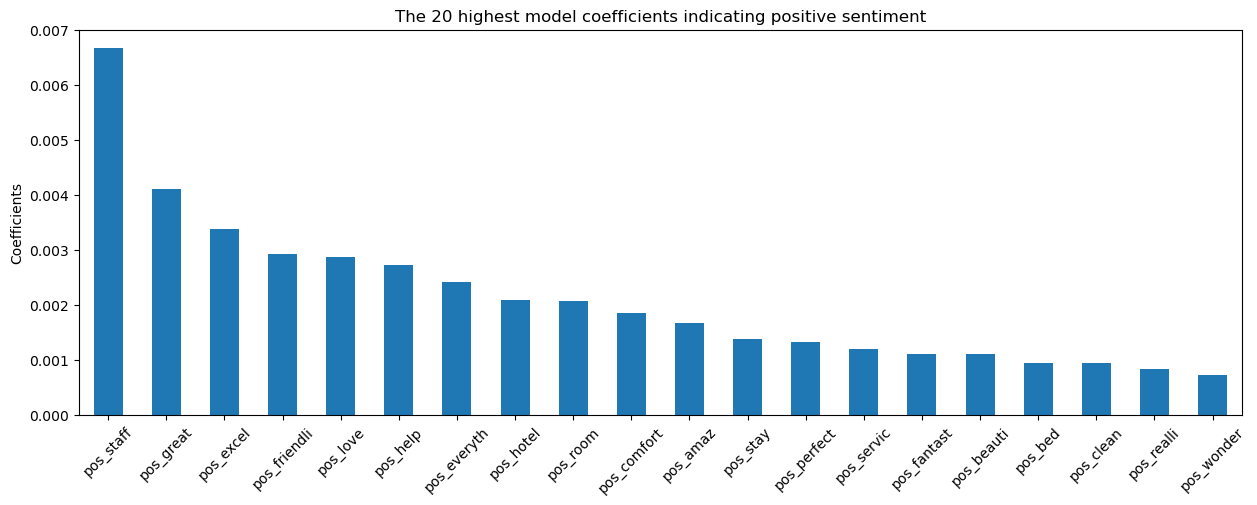

In [61]:
# Sort the positive review dataFrame by 'coef' to get the top 20
pos_coef_df.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In addition, let's find the top 20 words from the negative reviews that are most predictive of a negative sentiment (Reviewer_Score = 0).

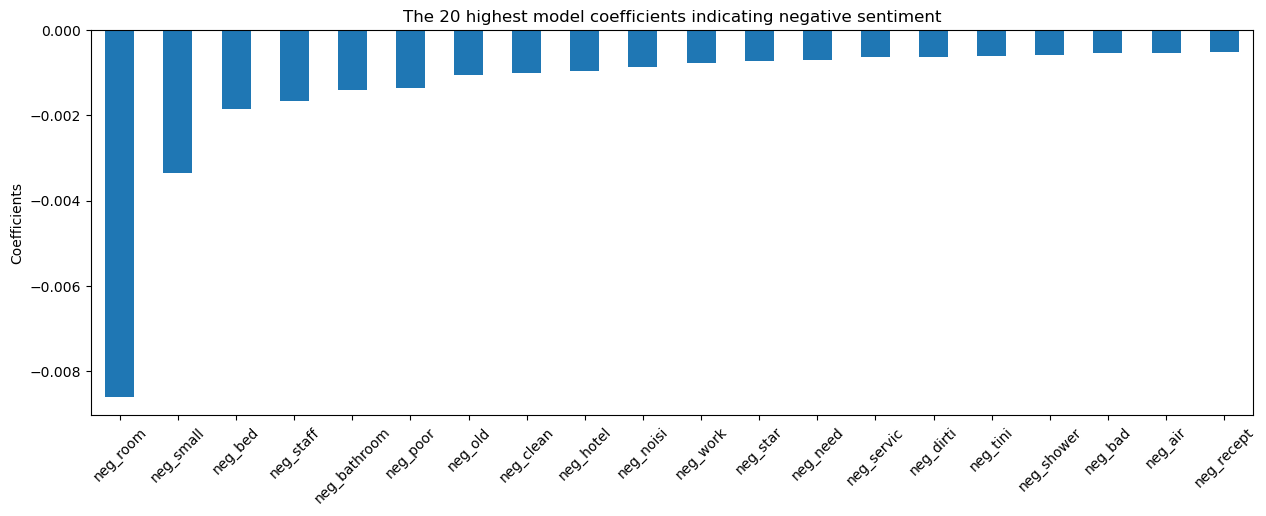

In [62]:
# Sort the negative review dataFrame by 'coef' to get the top 20
neg_coef_df.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()


What actionable insights can you draw from these?

**Observation:** <br/>

* According to the plots for the top 20 words in positive and negative reviews, we see some common words such as "staff," "room," "bed," and "clean."
* For positive reviews, the words "staff," "great," and "excel" have the top 3 coefficients. 
* We can also see words such as "friendli", "love", "help", and "beauti" are in the top 20 coefficients. 
* For negative reviews, the words "room," "small," and "bed" have the top 3 coefficients. 
* We can also see words such as "poor", "noisi", "dirti", "tini", and "bad" are in the top 20 coefficients.

#### Decision Tree - Base Model

Next, we will scale the data and fit it to a decision tree model using the default hyperparameters. Afterward, we will analyze the training and testing accuracy.

In [71]:
from sklearn.preprocessing import StandardScaler

# Make a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_train)

# Transform the data
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision tree model and fit the model
DT_model = DecisionTreeClassifier()
DT_model.fit(X_scaled_train, y_train);

In [75]:
# Evaluate its classification accuracy
print(f'Train score: {DT_model.score(X_scaled_train, y_train)}')
print(f'Test score: {DT_model.score(X_scaled_test, y_test)}')

Train score: 1.0
Test score: 0.699993530020704


#### Decision Tree - with Hyperparameter Optimization & PCA

Based on the train and test socre, our model is overfitting. <br/>
There are two pre-pruning techniques that can mitigate overfitting in decision tree model: 
* Using `max_depth`: we can limit the number of consecutive splits that can be made. This directly limits the overall complexity of the tree. It can't develop overly long and complex branches to fit each individual data point.
* Using `min_samples_leaf`: we can put a lower bound on the number of data points each region must cover. This forces the tree to fit regions around larger amounts of data, also preventing specific regions to fit around each individual data point.

First, we are going to find the `max_depth` and try to optimize the model. 

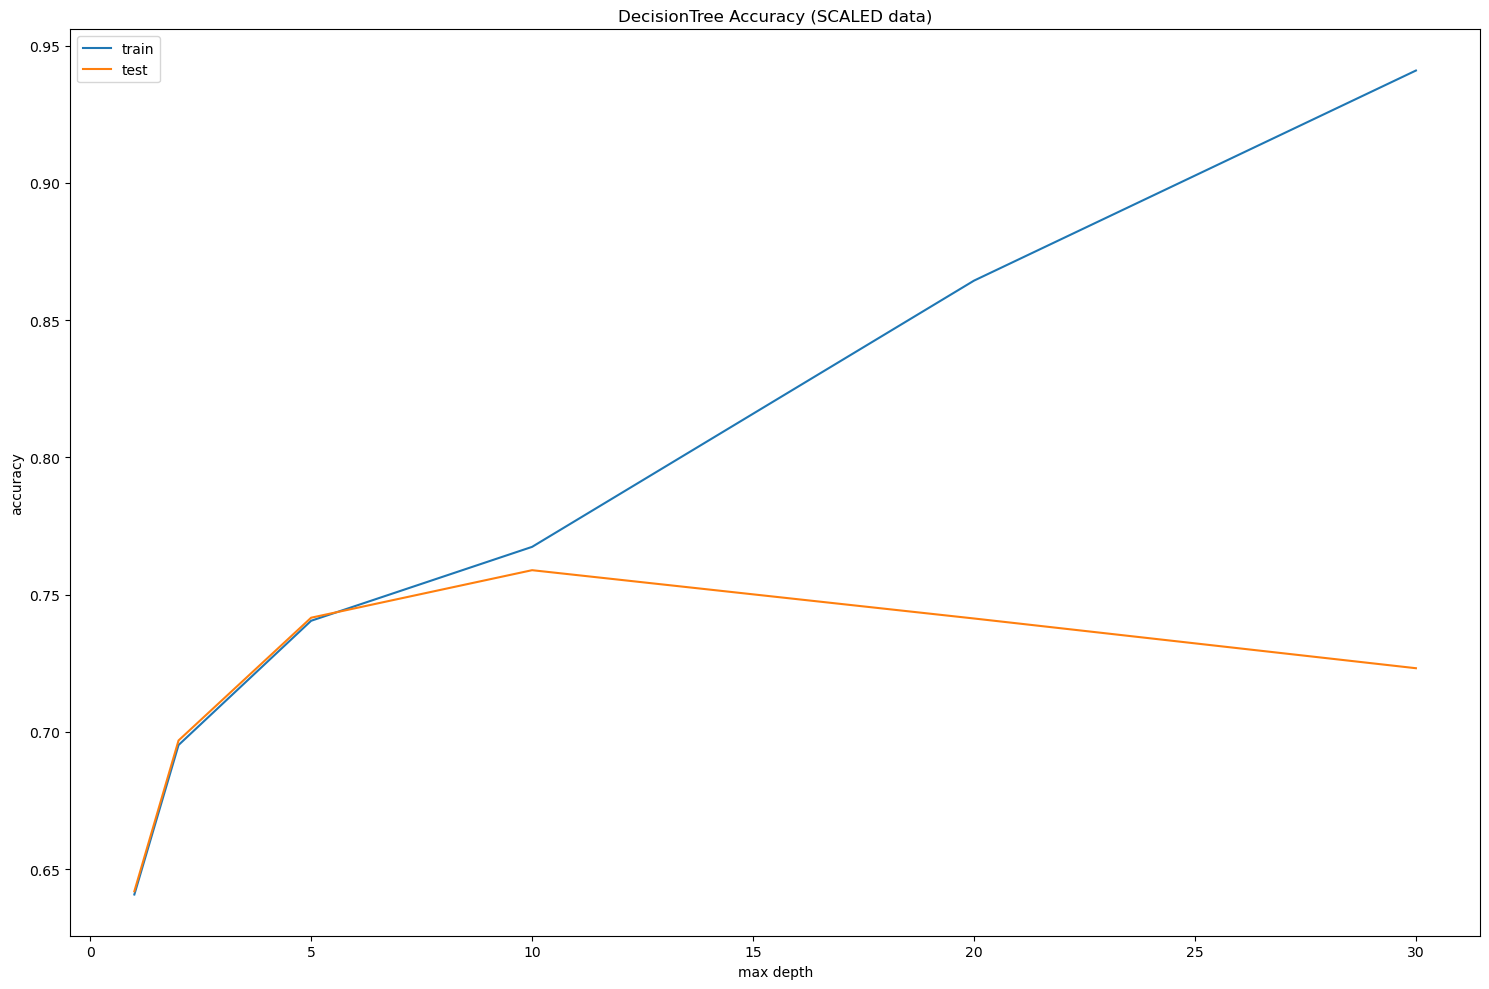

In [90]:
train_accs = []
test_accs = []
depth_values = [1, 2, 5, 10, 20, 30]

# Loop over different max_depths
for d in depth_values:

    # Instantiate & fit
    DT_model = DecisionTreeClassifier(max_depth = d)
    DT_model.fit(X_scaled_train, y_train)

    # Evaluate on train & test data
    train_accs.append( DT_model.score(X_scaled_train, y_train) )
    test_accs.append( DT_model.score(X_scaled_test, y_test) )

plt.figure(figsize=(15, 10))

# Plot the results
plt.plot(depth_values, train_accs, label='train')
plt.plot(depth_values, test_accs, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy (SCALED data)')

plt.tight_layout()
plt.show()

**Observation:** <br/>
According to the plot above, the model start overfitting around `max_depth` = 10. Our model performs better where `max_depth` between 7 to 10. 

Second, let's we will find the `min_samples_leaf` and try to optimize the model.

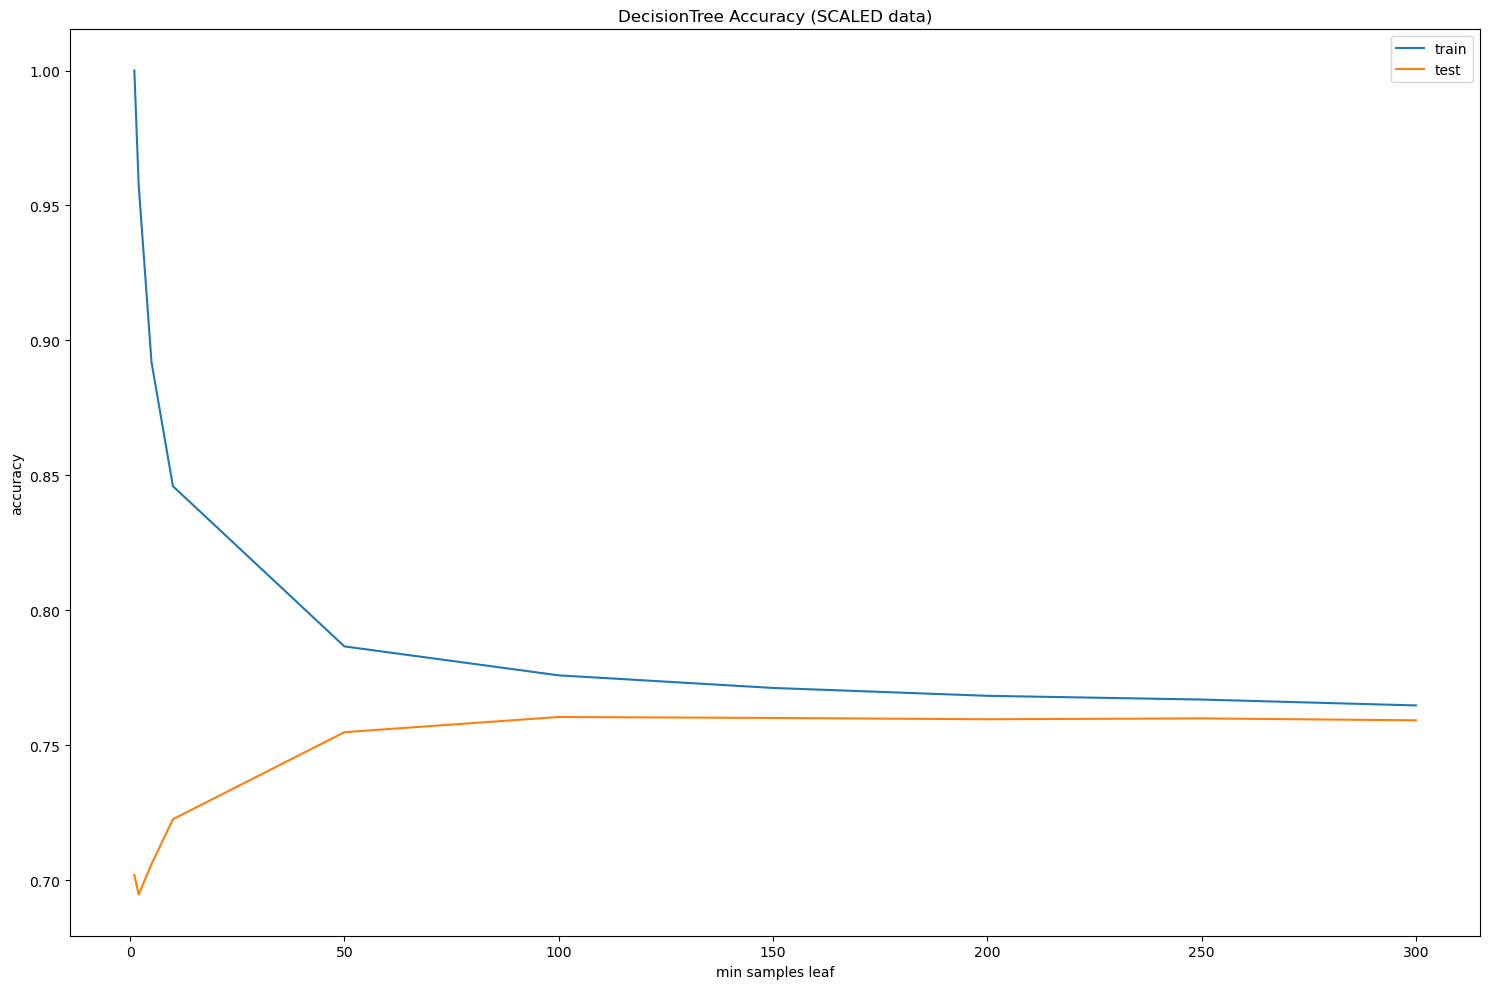

In [88]:
train_accs = []
test_accs = []
leaf_values = [1, 2, 5, 10, 50, 100, 150, 200, 250, 300]

# Loop over different min_samples_leaf
for l in leaf_values:

    # Instantiate & fit
    DT_model = DecisionTreeClassifier(min_samples_leaf = l)
    DT_model.fit(X_scaled_train, y_train)

    # Evaluate on train & test data
    train_accs.append( DT_model.score(X_scaled_train, y_train) )
    test_accs.append( DT_model.score(X_scaled_test, y_test) )

plt.figure(figsize=(15, 10))

# Plot the results
plt.plot(leaf_values, train_accs, label='train')
plt.plot(leaf_values, test_accs, label='test')
plt.legend()
plt.xlabel('min samples leaf')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy (SCALED data)')

plt.tight_layout()
plt.show()

**Observation:** <br/>
According to the plot above, the test accuracy improves around `min_samples_leaf` = 50 and after `min_samples_leaf` = 100 the accuracy level off quite a bit.

Last, we will find the `min_samples_split` and try to optimize the model.

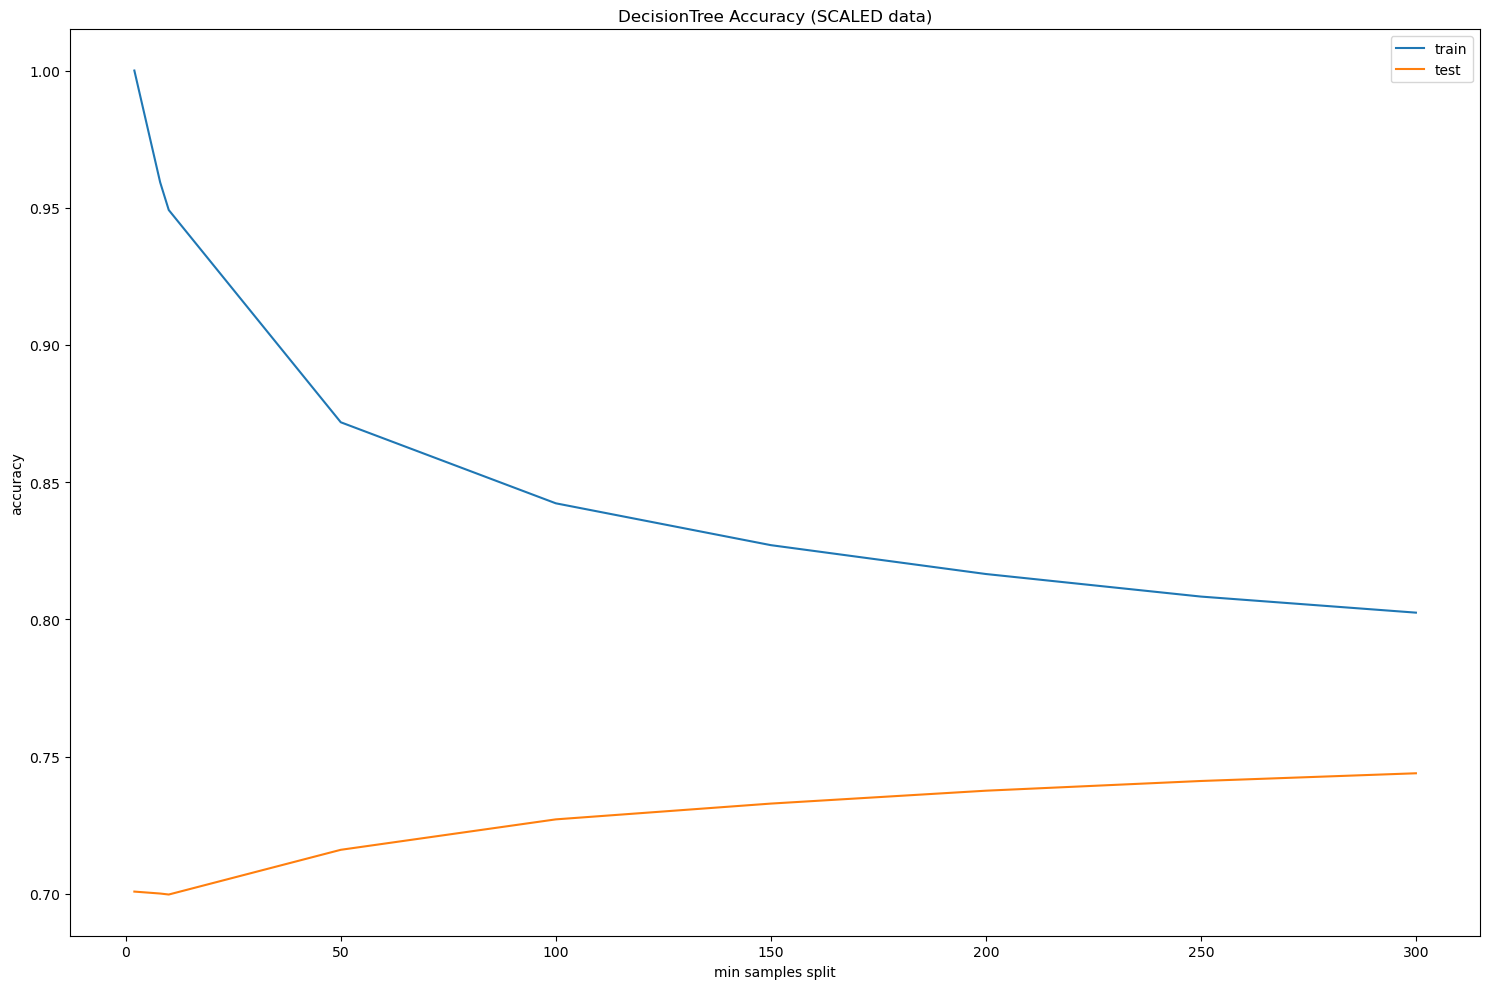

In [91]:
train_accs = []
test_accs = []
split_values = [ 2, 8, 10, 50, 100, 150, 200, 250, 300]

# Loop over different min_samples_leaf
for s in split_values:

    # Instantiate & fit
    DT_model = DecisionTreeClassifier(min_samples_split = s)
    DT_model.fit(X_scaled_train, y_train)

    # Evaluate on train & test data
    train_accs.append( DT_model.score(X_scaled_train, y_train) )
    test_accs.append( DT_model.score(X_scaled_test, y_test) )

plt.figure(figsize=(15, 10))

# Plot the results
plt.plot(split_values, train_accs, label='train')
plt.plot(split_values, test_accs, label='test')
plt.legend()
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy (SCALED data)')

plt.tight_layout()
plt.show()

**Observation:** <br/>
According to the plot, the trend of how the accuracy changes along with `min_samples_split` is similar to the previous plot for `min_samples_leaf`.

Let's use a pipeline, combine PCA with a decision tree classifier.<br/>

We need to optimize at least 3 hyperparameters including:
* `max_depth`: the maximum tree depth 
* `min_samples_leaf`: the minimum number of data points required on each leaf node 
* `min_samples_split`: the minimum number of samples required to split an internal node

We also will set the number of principle components(PCA) to 20.<br/>
In addition, we will find the best parameters by using 5-fold cross validation.

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp

# Define the pipeline steps
estimators = [
    ('scaler', StandardScaler()),
    ('dim_reducer', PCA(n_components=20)),
    ('model', DecisionTreeClassifier())
]

# Create a temporary directory for caching
cachedir = mkdtemp()
my_pipe = Pipeline(estimators, memory = cachedir)

# Define the parameter grid
param_grid = {
            'model__max_depth': [7, 8, 9, 10],
            'model__min_samples_split': [50, 100, 200, 300],
            'model__min_samples_leaf': [50, 100, 150, 200]}

# Create the GridSearchCV object
grid = GridSearchCV(my_pipe, param_grid, cv=5)

# Fit the GridSearchCV object
fittedgrid = grid.fit(X_train, y_train)

In [93]:
fittedgrid

GridSearchCV(cv=5,
             estimator=Pipeline(memory='/var/folders/ct/6pbvl36n32d1x96vhqy1v4c80000gn/T/tmpjcfu8_ud',
                                steps=[('scaler', StandardScaler()),
                                       ('dim_reducer', PCA(n_components=20)),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [7, 8, 9, 10],
                         'model__min_samples_leaf': [50, 100, 150, 200],
                         'model__min_samples_split': [50, 100, 200, 300]})

In [94]:
# Retrieve the best parameters
fittedgrid.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 150,
 'model__min_samples_split': 50}

The fitted search is the best found model, based on its cross-validation score in the grid search.

We can predict and score using the object:

In [98]:
# Evaluate its classification accuracy
print(f'Train score: {fittedgrid.score(X_train, y_train)}')
print(f'Test score: {fittedgrid.score(X_test, y_test)}')

Train score: 0.7624771585990423
Test score: 0.7573369565217392


The model with hyperparameter optimization and PCA is not overfitting. The test score improved from 69.9% to 75.7%, and the training score decreased from 100% to 76.2%.

#### Model Evaluation

So far, we have tried logistic regression, a decision tree, and a decision tree with hyperparameter optimization and PCA. The decision tree with hyperparameter optimization and PCA performs the best, achieving a test accuracy of 75.7%.

 Model                                                   | Train Score | Test Score  
|:---------:                                             |:-----------:|:-----------: 
| Logistic Regression                                    |    0.711      | 0.714
| Decision Tree (without Hyperparameter)                 |    1          | 0.699
| Decision Tree (with Hyperparameter Optimization & PCA) |    0.762      | 0.757

Let's evaluate our model by using the `classification_report` and `confusion_matrix`.

* `classification_report` function will compute precision, recall, and 𝐹1 score for both the positive class and also the negative class.
* `confusion_matrix` function returns the matrix as a numpy array and we plot the results as a heatmap which can be done directly by the `ConfusionMatrixDisplay`function.

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = fittedgrid.predict(X_test)

# Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.70     66216
           1       0.77      0.82      0.79     88344

    accuracy                           0.76    154560
   macro avg       0.75      0.75      0.75    154560
weighted avg       0.76      0.76      0.76    154560



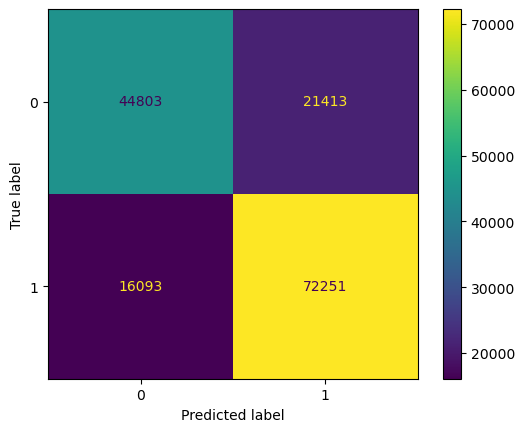

In [103]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

**Observation:**

According to the classification report:
* Class 0: The model has a precision of 74% and a recall of 68%, indicating that it is better at predicting negatives correctly when it does predict them, but it misses 32% of actual negatives.
* Class 1: The model performs better here with a precision of 77% and a recall of 82%, meaning it correctly identifies most of the actual positives and when it predicts positives, it is often correct.

Overall, the model has an accuracy of 76%, and the weighted averages for precision, recall, and F1-score are all 76%. This indicates a reasonably balanced performance across both classes, with a slight edge in predicting the positive class (Class 1).
This result suggests that the model is fairly good but has room for improvement, especially in increasing recall for Class 0 to better identify all negative instances.

## Conclusion




In this project, we performed exploratory data analysis (EDA), preprocessing the data, and creating models to predict the review score based on customer reviews and various hotel and review factors.

Our best model is the decision tree model with hyperparameter optimization and PCA, which has a test accuracy of 75.7%. Although our best model is fairly good, there is room for improvement, especially in increasing recall for Class 0 to better identify all negative instances. Further modeling and optimization can be done by using a pipeline that includes Grid Search CV or Randomized Search CV.